## Notebook to try to interpolate the CCI SST analysis

In [1]:
import sys
import xarray as xr
import glob
import dask
# note: need to pip install Pydap
#from pydap.client import open_url

In [2]:
import matplotlib.pyplot as plt
import cmocean

In [3]:
import time

In [31]:
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [4]:
# this is my local path to the data
# files = glob.glob('/Volumes/starly/sst/CCI/L4/**/**/*CDR2.1-v02.0-fv01.0.nc',recursive=True)

# try using OpenDAP access instead
#dataset = open_url('http://test.opendap.org/dap/data/nc/coads_climatology.nc')
# not sure if it is http or https? 
#dataset = open_url('http://dap.ceda.ac.uk/neodc/esacci/sst/data/CDR_v2/Analysis/L4/v2.1/1981/09/01/19810901120000-ESACCI-L4_GHRSST-SSTdepth-OSTIA-GLOB_CDR2.1-v02.0-fv01.0.nc')
#ds = xr.open_dataset('http://dap.ceda.ac.uk/neodc/esacci/sst/data/CDR_v2/Analysis/L4/v2.1/1981/09/01/19810901120000-ESACCI-L4_GHRSST-SSTdepth-OSTIA-GLOB_CDR2.1-v02.0-fv01.0.nc')
# from https://surftemp.github.io/sst-data-tutorials/tutorial1.html
# see https://registry.opendata.aws/surftemp-sst/
ds = xr.open_zarr('https://surftemp-sst.s3.us-west-2.amazonaws.com/data/sst.zarr')

In [5]:
ds

,Array,Chunk
Bytes,1.35 TiB,49.44 MiB
Shape,"(14367, 3600, 7200)","(50, 360, 720)"
Count,28801 Tasks,28800 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,1.35 TiB,49.44 MiB
Shape,"(14367, 3600, 7200)","(50, 360, 720)"
Count,28801 Tasks,28800 Chunks
Type,float32,numpy.ndarray
,Array,Chunk


In [6]:
display(ds.time[0]);display(ds.time[-1])

<xarray.DataArray 'time' ()>
array('1981-09-01T12:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 1981-09-01T12:00:00
Attributes:
    axis:           T
    bounds:         time_bnds
    comment:        
    long_name:      reference time of sst field
    standard_name:  time

<xarray.DataArray 'time' ()>
array('2020-12-31T12:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2020-12-31T12:00:00
Attributes:
    axis:           T
    bounds:         time_bnds
    comment:        
    long_name:      reference time of sst field
    standard_name:  time

In [8]:
drifter_file_path = '../data/process/gdp_v2.00.nc'
dr = xr.open_dataset(drifter_file_path,chunks={})
dr

<xarray.Dataset>
Dimensions:                (traj: 17324, obs: 165754333)
Coordinates:
    ID                     (traj) int64 dask.array<chunksize=(17324,), meta=np.ndarray>
    longitude              (obs) float32 dask.array<chunksize=(165754333,), meta=np.ndarray>
    latitude               (obs) float32 dask.array<chunksize=(165754333,), meta=np.ndarray>
    time                   (obs) datetime64[ns] dask.array<chunksize=(165754333,), meta=np.ndarray>
    ids                    (obs) int64 dask.array<chunksize=(165754333,), meta=np.ndarray>
Dimensions without coordinates: traj, obs
Data variables: (12/54)
    rowsize                (traj) int64 dask.array<chunksize=(17324,), meta=np.ndarray>
    location_type          (traj) bool dask.array<chunksize=(17324,), meta=np.ndarray>
    WMO                    (traj) int32 dask.array<chunksize=(17324,), meta=np.ndarray>
    expno                  (traj) int32 dask.array<chunksize=(17324,), meta=np.ndarray>
    deploy_date            (traj) datetime64[ns] dask.array<chunksize=(17324,), meta=np.ndarray>
    deploy_lon             (traj) float32 dask.array<chunksize=(17324,), meta=np.ndarray>
    ...                     ...
    err_sst                (obs) float32 dask.array<chunksize=(165754333,), meta=np.ndarray>
    err_sst1               (obs) float32 dask.array<chunksize=(165754333,), meta=np.ndarray>
    err_sst2               (obs) float32 dask.array<chunksize=(165754333,), meta=np.ndarray>
    flg_sst                (obs) int8 dask.array<chunksize=(165754333,), meta=np.ndarray>
    flg_sst1               (obs) int8 dask.array<chunksize=(165754333,), meta=np.ndarray>
    flg_sst2               (obs) int8 dask.array<chunksize=(165754333,), meta=np.ndarray>
Attributes: (12/15)
    title:             Global Drifter Program hourly drifting buoy collection
    history:           Version 2.00.  Metadata from dirall.dat and deplog.dat
    Conventions:       CF-1.6
    date_created:      2022-03-26T12:01:44.602178
    publisher_name:    GDP Drifter DAC
    publisher_email:   aoml.dftr@noaa.gov
    ...                ...
    metadata_link:     https://www.aoml.noaa.gov/phod/dac/dirall.html
    contributor_name:  NOAA Global Drifter Program
    contributor_role:  Data Acquisition Center
    institution:       NOAA Atlantic Oceanographic and Meteorological Laboratory
    acknowledgement:   Elipot et al. (2022) to be submitted. Elipot et al. (2...
    summary:           Global Drifter Program hourly data

In [11]:
traj_idx = np.insert(np.cumsum(dr.rowsize.values), 0, 0)

In [15]:
i = 10
dr.sst[slice(traj_idx[i], traj_idx[i+1])].compute()

<xarray.DataArray 'sst' (obs: 2253)>
array([294.827, 294.813, 294.809, ..., 301.638, 301.528, 301.398],
      dtype=float32)
Coordinates:
    longitude  (obs) float32 -55.59 -55.6 -55.6 -55.6 ... -59.2 -59.2 -59.2
    latitude   (obs) float32 35.35 35.35 35.34 35.34 ... 34.41 34.4 34.39 34.38
    time       (obs) datetime64[ns] 2012-05-31T03:00:00 ... 2012-09-01T23:00:00
    ids        (obs) int64 101517 101517 101517 101517 ... 101517 101517 101517
Dimensions without coordinates: obs
Attributes:
    long_name:  Fitted sea water temperature
    units:      Kelvin
    comments:   Estimated near-surface sea water temperature from drifting bu...

In [40]:
len(traj_idx)
# 1 + number of trajectory

17325

In [197]:
i = 17323
sli = slice(traj_idx[i], traj_idx[i+1])
sli

slice(165751206, 165754333, None)

In [131]:
t0 = time.time()
dsi = ds.interp(lon=dr.longitude[sli],lat=dr.latitude[sli],
                time=dr.time[sli])
t1 = time.time()-t0
display(t1)

0.507378101348877

In [132]:
# does this retain the result in memory
t0 = time.time()
dsi.analysed_sst.data.compute()
t1 = time.time()-t0
display(t1)

29.745841026306152

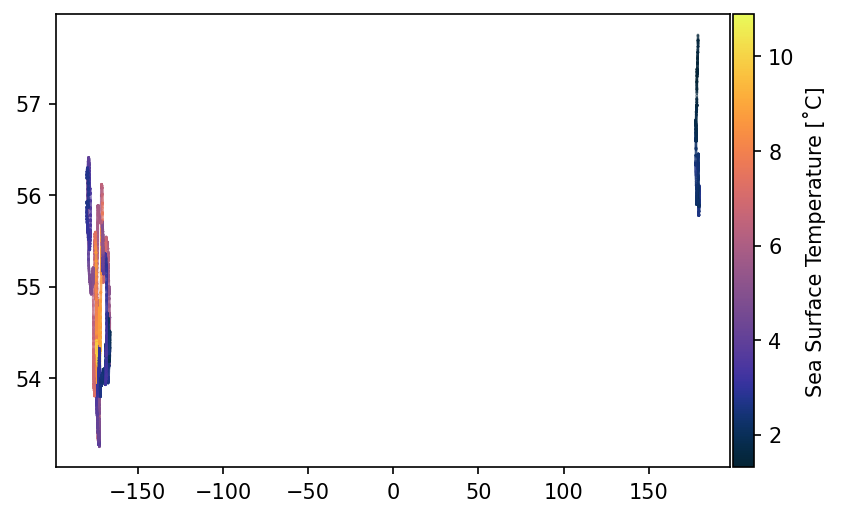

In [133]:
# does this redo the interpolation?
fig = plt.figure(dpi=150)
ax = fig.add_subplot()
pcm = ax.scatter(dr.longitude[sli],dr.latitude[sli],s=0.05,c=dsi.analysed_sst.data-273.15,cmap=cmocean.cm.thermal)
# what does this all do?
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='3%', pad=0.02, axes_class=plt.Axes)
cb = fig.colorbar(pcm, cax=cax)
cb.set_label('Sea Surface Temperature [˚C]')


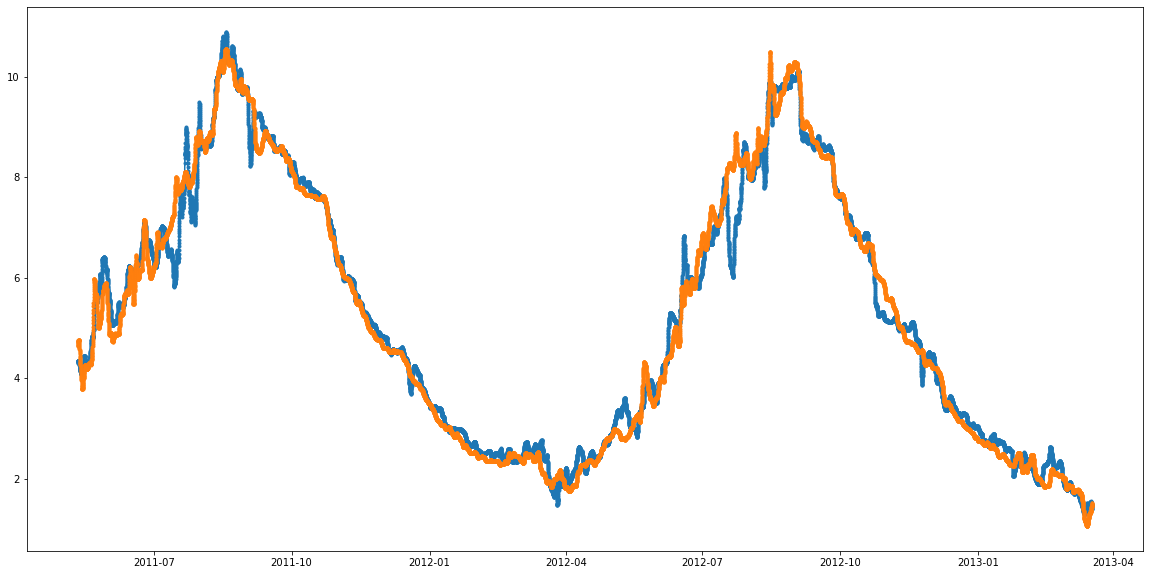

In [134]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot()
c1 = plt.plot(dr.time[sli],dsi.analysed_sst.data-273.15,marker='.')
c2 = plt.plot(dr.time[sli],dr.sst1[sli]-273.15,marker='.')

In [135]:
# this technically work
#t0 = time.time()
#dsi = ds.interp(lon=dr.longitude,lat=dr.latitude,time=dr.time)
#t1 = time.time()-t0
#display(t1)

In [136]:
dsi

<xarray.Dataset>
Dimensions:                   (obs: 16247, bnds: 2)
Coordinates:
    lon                       (obs) float32 -166.5 -166.5 -166.5 ... 179.0 178.9
    lat                       (obs) float32 54.2 54.21 54.22 ... 57.74 57.75
    time                      (obs) datetime64[ns] dask.array<chunksize=(16247,), meta=np.ndarray>
    longitude                 (obs) float32 dask.array<chunksize=(16247,), meta=np.ndarray>
    latitude                  (obs) float32 dask.array<chunksize=(16247,), meta=np.ndarray>
    ids                       (obs) int64 dask.array<chunksize=(16247,), meta=np.ndarray>
Dimensions without coordinates: obs, bnds
Data variables:
    analysed_sst              (obs) float32 dask.array<chunksize=(16247,), meta=np.ndarray>
    analysed_sst_uncertainty  (obs) float32 dask.array<chunksize=(16247,), meta=np.ndarray>
    lat_bnds                  (obs, bnds) float32 dask.array<chunksize=(16247, 2), meta=np.ndarray>
    lon_bnds                  (obs, bnds) float32 dask.array<chunksize=(16247, 2), meta=np.ndarray>
    mask                      (obs) float32 dask.array<chunksize=(16247,), meta=np.ndarray>
    sea_ice_fraction          (obs) float32 dask.array<chunksize=(16247,), meta=np.ndarray>
Attributes: (12/61)
    Conventions:                     CF-1.5, Unidata Observation Dataset v1.0
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    acknowledgment:                  Funded by the Copernicus Climate Change ...
    cdm_data_type:                   grid
    comment:                         These data were produced by the Met Offi...
    contact:                         http://copernicus-support.ecmwf.int
    ...                              ...
    time_coverage_resolution:        P1D
    time_coverage_start:             20201215T000000Z
    title:                           C3S SST L4 product
    tracking_id:                     7fdf2639-26e5-4d4f-a60e-0bcfc9744204
    uuid:                            7fdf2639-26e5-4d4f-a60e-0bcfc9744204
    westernmost_longitude:           -180.0

In [137]:
# but this will blow up my memory ... so can we loop over trajectories?
#dsi.to_netcdf('cci_sst.v2.00.nc')

In [138]:
rowsize = dr.rowsize.values

In [139]:
# so redo with chunks aligned?
chunk_settings = {'obs': tuple(rowsize.tolist())}
dr = xr.open_dataset(drifter_file_path, chunks=chunk_settings)

In [140]:
dr

<xarray.Dataset>
Dimensions:                (traj: 17324, obs: 165754333)
Coordinates:
    ID                     (traj) int64 dask.array<chunksize=(17324,), meta=np.ndarray>
    longitude              (obs) float32 dask.array<chunksize=(417,), meta=np.ndarray>
    latitude               (obs) float32 dask.array<chunksize=(417,), meta=np.ndarray>
    time                   (obs) datetime64[ns] dask.array<chunksize=(417,), meta=np.ndarray>
    ids                    (obs) int64 dask.array<chunksize=(417,), meta=np.ndarray>
Dimensions without coordinates: traj, obs
Data variables: (12/54)
    rowsize                (traj) int64 dask.array<chunksize=(17324,), meta=np.ndarray>
    location_type          (traj) bool dask.array<chunksize=(17324,), meta=np.ndarray>
    WMO                    (traj) int32 dask.array<chunksize=(17324,), meta=np.ndarray>
    expno                  (traj) int32 dask.array<chunksize=(17324,), meta=np.ndarray>
    deploy_date            (traj) datetime64[ns] dask.array<chunksize=(17324,), meta=np.ndarray>
    deploy_lon             (traj) float32 dask.array<chunksize=(17324,), meta=np.ndarray>
    ...                     ...
    err_sst                (obs) float32 dask.array<chunksize=(417,), meta=np.ndarray>
    err_sst1               (obs) float32 dask.array<chunksize=(417,), meta=np.ndarray>
    err_sst2               (obs) float32 dask.array<chunksize=(417,), meta=np.ndarray>
    flg_sst                (obs) int8 dask.array<chunksize=(417,), meta=np.ndarray>
    flg_sst1               (obs) int8 dask.array<chunksize=(417,), meta=np.ndarray>
    flg_sst2               (obs) int8 dask.array<chunksize=(417,), meta=np.ndarray>
Attributes: (12/15)
    title:             Global Drifter Program hourly drifting buoy collection
    history:           Version 2.00.  Metadata from dirall.dat and deplog.dat
    Conventions:       CF-1.6
    date_created:      2022-03-26T12:01:44.602178
    publisher_name:    GDP Drifter DAC
    publisher_email:   aoml.dftr@noaa.gov
    ...                ...
    metadata_link:     https://www.aoml.noaa.gov/phod/dac/dirall.html
    contributor_name:  NOAA Global Drifter Program
    contributor_role:  Data Acquisition Center
    institution:       NOAA Atlantic Oceanographic and Meteorological Laboratory
    acknowledgement:   Elipot et al. (2022) to be submitted. Elipot et al. (2...
    summary:           Global Drifter Program hourly data

In [169]:
#create an xarray dataset or dataarray first?
#dsi = np.zeros(len(dr.longitude))
dsi = xr.Dataset(data_vars=dict(
                        analysed_sst = np.nan*dr.sst,
                        analysed_sst_uncertainty = np.nan*dr.sst
                    ),
                 coords=dict(
                     longitude=dr.longitude,
                     latitude=dr.latitude,
                     time=dr.time)
                )

In [170]:
dsi.analysed_sst[0:10].data.compute()

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], dtype=float32)

In [ ]:
t0 = time.time()
for i in range(0,17324):
    sli = slice(traj_idx[i], traj_idx[i+1])
    # I think the interpolation interpolate all fields? why not the mask?
    dsi_tmp = ds.interp(lon=dr.longitude[sli],lat=dr.latitude[sli],
        time=dr.time[sli],method="linear")
    dsi.analysed_sst[sli] = dsi_tmp['analysed_sst']
    dsi.analysed_sst_uncertainty[sli] = dsi_tmp['analysed_sst_uncertainty']
    display(i)
t1 = time.time()-t0
display(t1)
dsi.to_netcdf('../data/process/gdp_cci_sst_v2.00.nc')
t2 = time.time()-t1
display(t2)

0

1

2

3

4

5

6

7

8

9

10

11

12

13

14

15

16

17

18

19

20

21

22

23

24

25

26

27

28

29

30

31

32

33

34

35

36

37

38

39

40

41

42

43

44

45

46

47

48

49

50

51

52

53

54

55

56

57

58

59

60

61

62

63

64

65

66

67

68

69

70

71

72

73

74

75

76

77

78

79

80

81

82

83

84

85

86

87

88

89

90

91

92

93

94

95

96

97

98

99

100

101

102

103

104

105

106

107

108

109

110

111

112

113

114

115

116

117

118

119

120

121

122

123

124

125

126

127

128

129

130

131

132

133

134

135

136

137

138

139

140

141

142

143

144

145

146

147

148

149

150

151

152

153

154

155

156

157

158

159

160

161

162

163

164

165

166

167

168

169

170

171

172

173

174

175

176

177

178

179

180

181

182

183

184

185

186

187

188

189

190

191

192

193

194

195

196

197

198

199

200

201

202

203

204

205

206

207

208

209

210

211

212

213

214

215

216

217

218

219

220

221

222

223

224

225

226

227

228

229

230

231

232

233

234

235

236

237

238

239

240

241

242

243

244

245

246

247

248

249

250

251

252

253

254

255

256

257

258

259

260

261

262

263

264

265

266

267

268

269

270

271

272

273

274

275

276

277

278

279

280

281

282

283

284

285

286

287

288

289

290

291

292

293

294

295

296

297

298

299

300

301

302

303

304

305

306

307

308

309

310

311

312

313

314

315

316

317

318

319

320

321

322

323

324

325

326

327

328

329

330

331

332

333

334

335

336

337

338

339

340

341

342

343

344

345

346

347

348

349

350

351

352

353

354

355

356

357

358

359

360

361

362

363

364

365

366

367

368

369

370

371

372

373

374

375

376

377

378

379

380

381

382

383

384

385

386

387

388

389

390

391

392

393

394

395

396

397

398

399

400

401

402

403

404

405

406

407

408

409

410

411

412

413

414

415

416

417

418

419

420

421

422

423

424

425

426

427

428

429

430

431

432

433

434

435

436

437

438

439

440

441

442

443

444

445

446

447

448

449

450

451

452

453

454

455

456

457

458

459

460

461

462

463

464

465

466

467

468

469

470

471

472

473

474

475

476

477

478

479

480

481

482

483

484

485

486

487

488

489

490

491

492

493

494

495

496

497

498

499

500

501

502

503

504

505

506

507

508

509

510

511

512

513

514

515

516

517

518

519

520

521

522

523

524

525

526

527

528

529

530

531

532

533

534

535

536

537

538

539

540

541

542

543

544

545

546

547

548

549

550

551

552

553

554

555

556

557

558

559

560

561

562

563

564

565

566

567

568

569

570

571

572

573

574

575

576

577

578

579

580

581

582

583

584

585

586

587

588

589

590

591

592

593

594

595

596

597

598

599

600

601

602

603

604

605

606

607

608

609

610

611

612

613

614

615

616

617

618

619

620

621

622

623

624

625

626

627

628

629

630

631

632

633

634

635

636

637

638

639

640

641

642

643

644

645

646

647

648

649

650

651

652

653

654

655

656

657

658

659

660

661

662

663

664

665

666

667

668

669

670

671

672

673

674

675

676

677

678

679

680

681

682

683

684

685

686

687

688

689

690

691

692

693

694

695

696

697

698

699

700

701

702

703

704

705

706

707

708

709

710

711

712

713

714

715

716

717

718

719

720

721

722

723

724

725

726

727

728

729

730

731

732

733

734

735

736

737

738

739

740

741

742

743

744

745

746

747

748

749

750

751

752

753

754

755

756

757

758

759

760

761

762

763

764

765

766

767

768

769

770

771

772

773

774

775

776

777

778

779

780

781

782

783

784

785

786

787

788

789

790

791

792

793

794

795

796

797

798

799

800

801

802

803

804

805

806

807

808

809

810

811

812

813

814

815

816

817

818

819

820

821

822

823

824

825

826

827

828

829

830

831

832

833

834

835

836

837

838

839

840

841

842

843

844

845

846

847

848

849

850

851

852

853

854

855

856

857

858

859

860

861

862

863

864

865

866

867

868

869

870

871

872

873

874

875

876

877

878

879

880

881

882

883

884

885

886

887

888

889

890

891

892

893

894

895

896

897

898

899

900

901

902

903

904

905

906

907

908

909

910

911

912

913

914

915

916

917

918

919

920

921

922

923

924

925

926

927

928

929

930

931

932

933

934

935

936

937

938

939

940

941

942

943

944

945

946

947

948

949

950

951

952

953

954

955

956

957

958

959

960

961

962

963

964

965

966

967

968

969

970

971

972

973

974

975

976

977

978

979

980

981

982

983

984

985

986

987

988

989

990

991

992

993

994

995

996

997

998

999

1000

1001

1002

1003

1004

1005

1006

1007

1008

1009

1010

1011

1012

1013

1014

1015

1016

1017

1018

1019

1020

1021

1022

1023

1024

1025

1026

1027

1028

1029

1030

1031

1032

1033

1034

1035

1036

1037

1038

1039

1040

1041

1042

1043

1044

1045

1046

1047

1048

1049

1050

1051

1052

1053

1054

1055

1056

1057

1058

1059

1060

1061

1062

1063

1064

1065

1066

1067

1068

1069

1070

1071

1072

1073

1074

1075

1076

1077

1078

1079

1080

1081

1082

1083

1084

1085

1086

1087

1088

1089

1090

1091

1092

1093

1094

1095

1096

1097

1098

1099

1100

1101

1102

1103

1104

1105

1106

1107

1108

1109

1110

1111

1112

1113

1114

1115

1116

1117

1118

1119

1120

1121

1122

1123

1124

1125

1126

1127

1128

1129

1130

1131

1132

1133

1134

1135

1136

1137

1138

1139

1140

1141

1142

1143

1144

1145

1146

1147

1148

1149

1150

1151

1152

1153

1154

1155

1156

1157

1158

1159

1160

1161

1162

1163

1164

1165

1166

1167

1168

1169

1170

1171

1172

1173

1174

1175

1176

1177

1178

1179

1180

1181

1182

1183

1184

1185

1186

1187

1188

1189

1190

1191

1192

1193

1194

1195

1196

1197

1198

1199

1200

1201

1202

1203

1204

1205

1206

1207

1208

1209

1210

1211

1212

1213

1214

1215

1216

1217

1218

1219

1220

1221

1222

1223

1224

1225

1226

1227

1228

1229

1230

1231

1232

1233

1234

1235

1236

1237

1238

1239

1240

1241

1242

1243

1244

1245

1246

1247

1248

1249

1250

1251

1252

1253

1254

1255

1256

1257

1258

1259

1260

1261

1262

1263

1264

1265

1266

1267

1268

1269

1270

1271

1272

1273

1274

1275

1276

1277

1278

1279

1280

1281

1282

1283

1284

1285

1286

1287

1288

1289

1290

1291

1292

1293

1294

1295

1296

1297

1298

1299

1300

1301

1302

1303

1304

1305

1306

1307

1308

1309

1310

1311

1312

1313

1314

1315

1316

1317

1318

1319

1320

1321

1322

1323

1324

1325

1326

1327

1328

1329

1330

1331

1332

1333

1334

1335

1336

1337

1338

1339

1340

1341

1342

1343

1344

1345

1346

1347

1348

1349

1350

1351

1352

1353

1354

1355

1356

1357

1358

1359

1360

1361

1362

1363

1364

1365

1366

1367

1368

1369

1370

1371

1372

1373

1374

1375

1376

1377

1378

1379

1380

1381

1382

1383

1384

1385

1386

1387

1388

1389

1390

1391

1392

1393

1394

1395

1396

1397

1398

1399

1400

1401

1402

1403

1404

1405

1406

1407

1408

1409

1410

1411

1412

1413

1414

1415

1416

1417

1418

1419

1420

1421

1422

1423

1424

1425

1426

1427

1428

1429

1430

1431

1432

1433

1434

1435

1436

1437

1438

1439

1440

1441

1442

1443

1444

1445

1446

1447

1448

1449

1450

1451

1452

1453

1454

1455

1456

1457

1458

1459

1460

1461

1462

1463

1464

1465

1466

1467

1468

1469

1470

1471

1472

1473

1474

1475

1476

1477

1478

1479

1480

1481

1482

1483

1484

1485

1486

1487

1488

1489

1490

1491

1492

1493

1494

1495

1496

1497

1498

1499

1500

1501

1502

1503

1504

1505

1506

1507

1508

1509

1510

1511

1512

1513

1514

1515

1516

1517

1518

1519

1520

1521

1522

1523

1524

1525

1526

1527

1528

1529

1530

1531

1532

1533

1534

1535

1536

1537

1538

1539

1540

1541

1542

1543

1544

1545

1546

1547

1548

1549

1550

1551

1552

1553

1554

1555

1556

1557

1558

1559

1560

1561

1562

1563

1564

1565

1566

1567

1568

1569

1570

1571

1572

1573

1574

1575

1576

1577

1578

1579

1580

1581

1582

1583

1584

1585

1586

1587

1588

1589

1590

1591

1592

1593

1594

1595

1596

1597

1598

1599

1600

1601

1602

1603

1604

1605

1606

1607

1608

1609

1610

1611

1612

1613

1614

1615

1616

1617

1618

1619

1620

1621

1622

1623

1624

1625

1626

1627

1628

1629

1630

1631

1632

1633

1634

1635

1636

1637

1638

1639

1640

1641

1642

1643

1644

1645

1646

1647

1648

1649

1650

1651

1652

1653

1654

1655

1656

1657

1658

1659

1660

1661

1662

1663

1664

1665

1666

1667

1668

1669

1670

1671

1672

1673

1674

1675

1676

1677

1678

1679

1680

1681

1682

1683

1684

1685

1686

1687

1688

1689

1690

1691

1692

1693

1694

1695

1696

1697

1698

1699

1700

1701

1702

1703

1704

1705

1706

1707

1708

1709

1710

1711

1712

1713

1714

1715

1716

1717

1718

1719

1720

1721

1722

1723

1724

1725

1726

1727

1728

1729

1730

1731

1732

1733

1734

1735

1736

1737

1738

1739

1740

1741

1742

1743

1744

1745

1746

1747

1748

1749

1750

1751

1752

1753

1754

1755

1756

1757

1758

1759

1760

1761

1762

1763

1764

1765

1766

1767

1768

1769

1770

1771

1772

1773

1774

1775

1776

1777

1778

1779

1780

1781

1782

1783

1784

1785

1786

1787

1788

1789

1790

1791

1792

1793

1794

1795

1796

1797

1798

1799

1800

1801

1802

1803

1804

1805

1806

1807

1808

1809

1810

1811

1812

1813

1814

1815

1816

1817

1818

1819

1820

1821

1822

1823

1824

1825

1826

1827

1828

1829

1830

1831

1832

1833

1834

1835

1836

1837

1838

1839

1840

1841

1842

1843

1844

1845

1846

1847

1848

1849

1850

1851

1852

1853

1854

1855

1856

1857

1858

1859

1860

1861

1862

1863

1864

1865

1866

1867

1868

1869

1870

1871

1872

1873

1874

1875

1876

1877

1878

1879

1880

1881

1882

1883

1884

1885

1886

1887

1888

1889

1890

1891

1892

1893

1894

1895

1896

1897

1898

1899

1900

1901

1902

1903

1904

1905

1906

1907

1908

1909

1910

1911

1912

1913

1914

1915

1916

1917

1918

1919

1920

1921

1922

1923

1924

1925

1926

1927

1928

1929

1930

1931

1932

1933

1934

1935

1936

1937

1938

1939

1940

1941

1942

1943

1944

1945

1946

1947

1948

1949

1950

1951

1952

1953

1954

1955

1956

1957

1958

1959

1960

1961

1962

1963

1964

1965

1966

1967

1968

1969

1970

1971

1972

1973

1974

1975

1976

1977

1978

1979

1980

1981

1982

1983

1984

1985

1986

1987

1988

1989

1990

1991

1992

1993

1994

1995

1996

1997

1998

1999

2000

2001

2002

2003

2004

2005

2006

2007

2008

2009

2010

2011

2012

2013

2014

2015

2016

2017

2018

2019

2020

2021

2022

2023

2024

2025

2026

2027

2028

2029

2030

2031

2032

2033

2034

2035

2036

2037

2038

2039

2040

2041

2042

2043

2044

2045

2046

2047

2048

2049

2050

2051

2052

2053

2054

2055

2056

2057

2058

2059

2060

2061

2062

2063

2064

2065

2066

2067

2068

2069

2070

2071

2072

2073

2074

2075

2076

2077

2078

2079

2080

2081

2082

2083

2084

2085

2086

2087

2088

2089

2090

2091

2092

2093

2094

2095

2096

2097

2098

2099

2100

2101

2102

2103

2104

2105

2106

2107

2108

2109

2110

2111

2112

2113

2114

2115

2116

2117

2118

2119

2120

2121

2122

2123

2124

2125

2126

2127

2128

2129

2130

2131

2132

2133

2134

2135

2136

2137

2138

2139

2140

2141

2142

2143

2144

2145

2146

2147

2148

2149

2150

2151

2152

2153

2154

2155

2156

2157

2158

2159

2160

2161

2162

2163

2164

2165

2166

2167

2168

2169

2170

2171

2172

2173

2174

2175

2176

2177

2178

2179

2180

2181

2182

2183

2184

2185

2186

2187

2188

2189

2190

2191

2192

2193

2194

2195

2196

2197

2198

2199

2200

2201

2202

2203

2204

2205

2206

2207

2208

2209

2210

2211

2212

2213

2214

2215

2216

2217

2218

2219

2220

2221

2222

2223

2224

2225

2226

2227

2228

2229

2230

2231

2232

2233

2234

2235

2236

2237

2238

2239

2240

2241

2242

2243

2244

2245

2246

2247

2248

2249

2250

2251

2252

2253

2254

2255

2256

2257

2258

2259

2260

2261

2262

2263

2264

2265

2266

2267

2268

2269

2270

2271

2272

2273

2274

2275

2276

2277

2278

2279

2280

2281

2282

2283

2284

2285

2286

2287

2288

2289

2290

2291

2292

2293

2294

2295

2296

2297

2298

2299

2300

2301

2302

2303

2304

2305

2306

2307

2308

2309

2310

2311

2312

2313

2314

2315

2316

2317

2318

2319

2320

2321

2322

2323

2324

2325

2326

2327

2328

2329

2330

2331

2332

2333

2334

2335

2336

2337

2338

2339

2340

2341

2342

2343

2344

2345

2346

2347

2348

2349

2350

2351

2352

2353

2354

2355

2356

2357

2358

2359

2360

2361

2362

2363

2364

2365

2366

2367

2368

2369

2370

2371

2372

2373

2374

2375

2376

2377

2378

2379

2380

2381

2382

2383

2384

2385

2386

2387

2388

2389

2390

2391

2392

2393

2394

2395

2396

2397

2398

2399

2400

2401

2402

2403

2404

2405

2406

2407

2408

2409

2410

2411

2412

2413

2414

2415

2416

2417

2418

2419

2420

2421

2422

2423

2424

2425

2426

2427

2428

2429

2430

2431

2432

2433

2434

2435

2436

2437

2438

2439

2440

2441

2442

2443

2444

2445

2446

2447

2448

2449

2450

2451

2452

2453

2454

2455

2456

2457

2458

2459

2460

2461

2462

2463

2464

2465

2466

2467

2468

2469

2470

2471

2472

2473

2474

2475

2476

2477

2478

2479

2480

2481

2482

2483

2484

2485

2486

2487

2488

2489

2490

2491

2492

2493

2494

2495

2496

2497

2498

2499

2500

2501

2502

2503

2504

2505

2506

2507

2508

2509

2510

2511

2512

2513

2514

2515

2516

2517

2518

2519

2520

2521

2522

2523

2524

2525

2526

2527

2528

2529

2530

2531

2532

2533

2534

2535

2536

2537

2538

2539

2540

2541

2542

2543

2544

2545

2546

2547

2548

2549

2550

2551

2552

2553

2554

2555

2556

2557

2558

2559

2560

2561

2562

2563

2564

2565

2566

2567

2568

2569

2570

2571

2572

2573

2574

2575

2576

2577

2578

2579

2580

2581

2582

2583

2584

2585

2586

2587

2588

2589

2590

2591

2592

2593

2594

2595

2596

2597

2598

2599

2600

2601

2602

2603

2604

2605

2606

2607

2608

2609

2610

2611

2612

2613

2614

2615

2616

2617

2618

2619

2620

2621

2622

2623

2624

2625

2626

2627

2628

2629

2630

2631

2632

2633

2634

2635

2636

2637

2638

2639

2640

2641

2642

2643

2644

2645

2646

2647

2648

2649

2650

2651

2652

2653

2654

2655

2656

2657

2658

2659

2660

2661

2662

2663

2664

2665

2666

2667

2668

2669

2670

2671

2672

2673

2674

2675

2676

2677

2678

2679

2680

2681

2682

2683

2684

2685

2686

2687

2688

2689

2690

2691

2692

2693

2694

2695

2696

2697

2698

2699

2700

2701

2702

2703

2704

2705

2706

2707

2708

2709

2710

2711

2712

2713

2714

2715

2716

2717

2718

2719

2720

2721

2722

2723

2724

2725

2726

2727

2728

2729

2730

2731

2732

2733

2734

2735

2736

2737

2738

2739

2740

2741

2742

2743

2744

2745

2746

2747

2748

2749

2750

2751

2752

2753

2754

2755

2756

2757

2758

2759

2760

2761

2762

2763

2764

2765

2766

2767

2768

2769

2770

2771

2772

2773

2774

2775

2776

2777

2778

2779

2780

2781

2782

2783

2784

2785

2786

2787

2788

2789

2790

2791

2792

2793

2794

2795

2796

2797

2798

2799

2800

2801

2802

2803

2804

2805

2806

2807

2808

2809

2810

2811

2812

2813

2814

2815

2816

2817

2818

2819

2820

2821

2822

2823

2824

2825

2826

2827

2828

2829

2830

2831

2832

2833

2834

2835

2836

2837

2838

2839

2840

2841

2842

2843

2844

2845

2846

2847

2848

2849

2850

2851

2852

2853

2854

2855

2856

2857

2858

2859

2860

2861

2862

2863

2864

2865

2866

2867

2868

2869

2870

2871

2872

2873

2874

2875

2876

2877

2878

2879

2880

2881

2882

2883

2884

2885

2886

2887

2888

2889

2890

2891

2892

2893

2894

2895

2896

2897

2898

2899

2900

2901

2902

2903

2904

2905

2906

2907

2908

2909

2910

2911

2912

2913

2914

2915

2916

2917

2918

2919

2920

2921

2922

2923

2924

2925

2926

2927

2928

2929

2930

2931

2932

2933

2934

2935

2936

2937

2938

2939

2940

2941

2942

2943

2944

2945

2946

2947

2948

2949

2950

2951

2952

2953

2954

2955

2956

2957

2958

2959

2960

2961

2962

2963

2964

2965

2966

2967

2968

2969

2970

2971

2972

2973

2974

2975

2976

2977

2978

2979

2980

2981

2982

2983

2984

2985

2986

2987

2988

2989

2990

2991

2992

2993

2994

2995

2996

2997

2998

2999

3000

3001

3002

3003

3004

3005

3006

3007

3008

3009

3010

3011

3012

3013

3014

3015

3016

3017

3018

3019

3020

3021

3022

3023

3024

3025

3026

3027

3028

3029

3030

3031

3032

3033

3034

3035

3036

3037

3038

3039

3040

3041

3042

3043

3044

3045

3046

3047

3048

3049

3050

3051

3052

3053

3054

3055

3056

3057

3058

3059

3060

3061

3062

3063

3064

3065

3066

3067

3068

3069

3070

3071

3072

3073

3074

3075

3076

3077

3078

3079

3080

3081

3082

3083

3084

3085

3086

3087

3088

3089

3090

3091

3092

3093

3094

3095

3096

3097

3098

3099

3100

3101

3102

3103

3104

3105

3106

3107

3108

3109

3110

3111

3112

3113

3114

3115

3116

3117

3118

3119

3120

3121

3122

3123

3124

3125

3126

3127

3128

3129

3130

3131

3132

3133

3134

3135

3136

3137

3138

3139

3140

3141

3142

3143

3144

3145

3146

3147

3148

3149

3150

3151

3152

3153

3154

3155

3156

3157

3158

3159

3160

3161

3162

3163

3164

3165

3166

3167

3168

3169

3170

3171

3172

3173

3174

3175

3176

3177

3178

3179

3180

3181

3182

3183

3184

3185

3186

3187

3188

3189

3190

3191

3192

3193

3194

3195

3196

3197

3198

3199

3200

3201

3202

3203

3204

3205

3206

3207

3208

3209

3210

3211

3212

3213

3214

3215

3216

3217

3218

3219

3220

3221

3222

3223

3224

3225

3226

3227

3228

3229

3230

3231

3232

3233

3234

3235

3236

3237

3238

3239

3240

3241

3242

3243

3244

3245

3246

3247

3248

3249

3250

3251

3252

3253

3254

3255

3256

3257

3258

3259

3260

3261

3262

3263

3264

3265

3266

3267

3268

3269

3270

3271

3272

3273

3274

3275

3276

3277

3278

3279

3280

3281

3282

3283

3284

3285

3286

3287

3288

3289

3290

3291

3292

3293

3294

3295

3296

3297

3298

3299

3300

3301

3302

3303

3304

3305

3306

3307

3308

3309

3310

3311

3312

3313

3314

3315

3316

3317

3318

3319

3320

3321

3322

3323

3324

3325

3326

3327

3328

3329

3330

3331

3332

3333

3334

3335

3336

3337

3338

3339

3340

3341

3342

3343

3344

3345

3346

3347

3348

3349

3350

3351

3352

3353

3354

3355

3356

3357

3358

3359

3360

3361

3362

3363

3364

3365

3366

3367

3368

3369

3370

3371

3372

3373

3374

3375

3376

3377

3378

3379

3380

3381

3382

3383

3384

3385

3386

3387

3388

3389

3390

3391

3392

3393

3394

3395

3396

3397

3398

3399

3400

3401

3402

3403

3404

3405

3406

3407

3408

3409

3410

3411

3412

3413

3414

3415

3416

3417

3418

3419

3420

3421

3422

3423

3424

3425

3426

3427

3428

3429

3430

3431

3432

3433

3434

3435

3436

3437

3438

3439

3440

3441

3442

3443

3444

3445

3446

3447

3448

3449

3450

3451

3452

3453

3454

3455

3456

3457

3458

3459

3460

3461

3462

3463

3464

3465

3466

3467

3468

3469

3470

3471

3472

3473

3474

3475

3476

3477

3478

3479

3480

3481

3482

3483

3484

3485

3486

3487

3488

3489

3490

3491

3492

3493

3494

3495

3496

3497

3498

3499

3500

3501

3502

3503

3504

3505

3506

3507

3508

3509

3510

3511

3512

3513

3514

3515

3516

3517

3518

3519

3520

3521

3522

3523

3524

3525

3526

3527

3528

3529

3530

3531

3532

3533

3534

3535

3536

3537

3538

3539

3540

3541

3542

3543

3544

3545

3546

3547

3548

3549

3550

3551

3552

3553

3554

3555

3556

3557

3558

3559

3560

3561

3562

3563

3564

3565

3566

3567

3568

3569

3570

3571

3572

3573

3574

3575

3576

3577

3578

3579

3580

3581

3582

3583

3584

3585

3586

3587

3588

3589

3590

3591

3592

3593

3594

3595

3596

3597

3598

3599

3600

3601

3602

3603

3604

3605

3606

3607

3608

3609

3610

3611

3612

3613

3614

3615

3616

3617

3618

3619

3620

3621

3622

3623

3624

3625

3626

3627

3628

3629

3630

3631

3632

3633

3634

3635

3636

3637

3638

3639

3640

3641

3642

3643

3644

3645

3646

3647

3648

3649

3650

3651

3652

3653

3654

3655

3656

3657

3658

3659

3660

3661

3662

3663

3664

3665

3666

3667

3668

3669

3670

3671

3672

3673

3674

3675

3676

3677

3678

3679

3680

3681

3682

3683

3684

3685

3686

3687

3688

3689

3690

3691

3692

3693

3694

3695

3696

3697

3698

3699

3700

3701

3702

3703

3704

3705

3706

3707

3708

3709

3710

3711

3712

3713

3714

3715

3716

3717

3718

3719

3720

3721

3722

3723

3724

3725

3726

3727

3728

3729

3730

3731

3732

3733

3734

3735

3736

3737

3738

3739

3740

3741

3742

3743

3744

3745

3746

3747

3748

3749

3750

3751

3752

3753

3754

3755

3756

3757

3758

3759

3760

3761

3762

3763

3764

3765

3766

3767

3768

3769

3770

3771

3772

3773

3774

3775

3776

3777

3778

3779

3780

3781

3782

3783

3784

3785

3786

3787

3788

3789

3790

3791

3792

3793

3794

3795

3796

3797

3798

3799

3800

3801

3802

3803

3804

3805

3806

3807

3808

3809

3810

3811

3812

3813

3814

3815

3816

3817

3818

3819

3820

3821

3822

3823

3824

3825

3826

3827

3828

3829

3830

3831

3832

3833

3834

3835

3836

3837

3838

3839

3840

3841

3842

3843

3844

3845

3846

3847

3848

3849

3850

3851

3852

3853

3854

3855

3856

3857

3858

3859

3860

3861

3862

3863

3864

3865

3866

3867

3868

3869

3870

3871

3872

3873

3874

3875

3876

3877

3878

3879

3880

3881

3882

3883

3884

3885

3886

3887

3888

3889

3890

3891

3892

3893

3894

3895

3896

3897

3898

3899

3900

3901

3902

3903

3904

3905

3906

3907

3908

3909

3910

3911

3912

3913

3914

3915

3916

3917

3918

3919

3920

3921

3922

3923

3924

3925

3926

3927

3928

3929

3930

3931

3932

3933

3934

3935

3936

3937

3938

3939

3940

3941

3942

3943

3944

3945

3946

3947

3948

3949

3950

3951

3952

3953

3954

3955

3956

3957

3958

3959

3960

3961

3962

3963

3964

3965

3966

3967

3968

3969

3970

3971

3972

3973

3974

3975

3976

3977

3978

3979

3980

3981

3982

3983

3984

3985

3986

3987

3988

3989

3990

3991

3992

3993

3994

3995

3996

3997

3998

3999

4000

4001

4002

4003

4004

4005

4006

4007

4008

4009

4010

4011

4012

4013

4014

4015

4016

4017

4018

4019

4020

4021

4022

4023

4024

4025

4026

4027

4028

4029

4030

4031

4032

4033

4034

4035

4036

4037

4038

4039

4040

4041

4042

4043

4044

4045

4046

4047

4048

4049

4050

4051

4052

4053

4054

4055

4056

4057

4058

4059

4060

4061

4062

4063

4064

4065

4066

4067

4068

4069

4070

4071

4072

4073

4074

4075

4076

4077

4078

4079

4080

4081

4082

4083

4084

4085

4086

4087

4088

4089

4090

4091

4092

4093

4094

4095

4096

4097

4098

4099

4100

4101

4102

4103

4104

4105

4106

4107

4108

4109

4110

4111

4112

4113

4114

4115

4116

4117

4118

4119

4120

4121

4122

4123

4124

4125

4126

4127

4128

4129

4130

4131

4132

4133

4134

4135

4136

4137

4138

4139

4140

4141

4142

4143

4144

4145

4146

4147

4148

4149

4150

4151

4152

4153

4154

4155

4156

4157

4158

4159

4160

4161

4162

4163

4164

4165

4166

4167

4168

4169

4170

4171

4172

4173

4174

4175

4176

4177

4178

4179

4180

4181

4182

4183

4184

4185

4186

4187

4188

4189

4190

4191

4192

4193

4194

4195

4196

4197

4198

4199

4200

4201

4202

4203

4204

4205

4206

4207

4208

4209

4210

4211

4212

4213

4214

4215

4216

4217

4218

4219

4220

4221

4222

4223

4224

4225

4226

4227

4228

4229

4230

4231

4232

4233

4234

4235

4236

4237

4238

4239

4240

4241

4242

4243

4244

4245

4246

4247

4248

4249

4250

4251

4252

4253

4254

4255

4256

4257

4258

4259

4260

4261

4262

4263

4264

4265

4266

4267

4268

4269

4270

4271

4272

4273

4274

4275

4276

4277

4278

4279

4280

4281

4282

4283

4284

4285

4286

4287

4288

4289

4290

4291

4292

4293

4294

4295

4296

4297

4298

4299

4300

4301

4302

4303

4304

4305

4306

4307

4308

4309

4310

4311

4312

4313

4314

4315

4316

4317

4318

4319

4320

4321

4322

4323

4324

4325

4326

4327

4328

4329

4330

4331

4332

4333

4334

4335

4336

4337

4338

4339

4340

4341

4342

4343

4344

4345

4346

4347

4348

4349

4350

4351

4352

4353

4354

4355

4356

4357

4358

4359

4360

4361

4362

4363

4364

4365

4366

4367

4368

4369

4370

4371

4372

4373

4374

4375

4376

4377

4378

4379

4380

4381

4382

4383

4384

4385

4386

4387

4388

4389

4390

4391

4392

4393

4394

4395

4396

4397

4398

4399

4400

4401

4402

4403

4404

4405

4406

4407

4408

4409

4410

4411

4412

4413

4414

4415

4416

4417

4418

4419

4420

4421

4422

4423

4424

4425

4426

4427

4428

4429

4430

4431

4432

4433

4434

4435

4436

4437

4438

4439

4440

4441

4442

4443

4444

4445

4446

4447

4448

4449

4450

4451

4452

4453

4454

4455

4456

4457

4458

4459

4460

4461

4462

4463

4464

4465

4466

4467

4468

4469

4470

4471

4472

4473

4474

4475

4476

4477

4478

4479

4480

4481

4482

4483

4484

4485

4486

4487

4488

4489

4490

4491

4492

4493

4494

4495

4496

4497

4498

4499

4500

4501

4502

4503

4504

4505

4506

4507

4508

4509

4510

4511

4512

4513

4514

4515

4516

4517

4518

4519

4520

4521

4522

4523

4524

4525

4526

4527

4528

4529

4530

4531

4532

4533

4534

4535

4536

4537

4538

4539

4540

4541

4542

4543

4544

4545

4546

4547

4548

4549

4550

4551

4552

4553

4554

4555

4556

4557

4558

4559

4560

4561

4562

4563

4564

4565

4566

4567

4568

4569

4570

4571

4572

4573

4574

4575

4576

4577

4578

4579

4580

4581

4582

4583

4584

4585

4586

4587

4588

4589

4590

4591

4592

4593

4594

4595

4596

4597

4598

4599

4600

4601

4602

4603

4604

4605

4606

4607

4608

4609

4610

4611

4612

4613

4614

4615

4616

4617

4618

4619

4620

4621

4622

4623

4624

4625

4626

4627

4628

4629

4630

4631

4632

4633

4634

4635

4636

4637

4638

4639

4640

4641

4642

4643

4644

4645

4646

4647

4648

4649

4650

4651

4652

4653

4654

4655

4656

4657

4658

4659

4660

4661

4662

4663

4664

4665

4666

4667

4668

4669

4670

4671

4672

4673

4674

4675

4676

4677

4678

4679

4680

4681

4682

4683

4684

4685

4686

4687

4688

4689

4690

4691

4692

4693

4694

4695

4696

4697

4698

4699

4700

4701

4702

4703

4704

4705

4706

4707

4708

4709

4710

4711

4712

4713

4714

4715

4716

4717

4718

4719

4720

4721

4722

4723

4724

4725

4726

4727

4728

4729

4730

4731

4732

4733

4734

4735

4736

4737

4738

4739

4740

4741

4742

4743

4744

4745

4746

4747

4748

4749

4750

4751

4752

4753

4754

4755

4756

4757

4758

4759

4760

4761

4762

4763

4764

4765

4766

4767

4768

4769

4770

4771

4772

4773

4774

4775

4776

4777

4778

4779

4780

4781

4782

4783

4784

4785

4786

4787

4788

4789

4790

4791

4792

4793

4794

4795

4796

4797

4798

4799

4800

4801

4802

4803

4804

4805

4806

4807

4808

4809

4810

4811

4812

4813

4814

4815

4816

4817

4818

4819

4820

4821

4822

4823

4824

4825

4826

4827

4828

4829

4830

4831

4832

4833

4834

4835

4836

4837

4838

4839

4840

4841

4842

4843

4844

4845

4846

4847

4848

4849

4850

4851

4852

4853

4854

4855

4856

4857

4858

4859

4860

4861

4862

4863

4864

4865

4866

4867

4868

4869

4870

4871

4872

4873

4874

4875

4876

4877

4878

4879

4880

4881

4882

4883

4884

4885

4886

4887

4888

4889

4890

4891

4892

4893

4894

4895

4896

4897

4898

4899

4900

4901

4902

4903

4904

4905

4906

4907

4908

4909

4910

4911

4912

4913

4914

4915

4916

4917

4918

4919

4920

4921

4922

4923

4924

4925

4926

4927

4928

4929

4930

4931

4932

4933

4934

4935

4936

4937

4938

4939

4940

4941

4942

4943

4944

4945

4946

4947

4948

4949

4950

4951

4952

4953

4954

4955

4956

4957

4958

4959

4960

4961

4962

4963

4964

4965

4966

4967

4968

4969

4970

4971

4972

4973

4974

4975

4976

4977

4978

4979

4980

4981

4982

4983

4984

4985

4986

4987

4988

4989

4990

4991

4992

4993

4994

4995

4996

4997

4998

4999

5000

5001

5002

5003

5004

5005

5006

5007

5008

5009

5010

5011

5012

5013

5014

5015

5016

5017

5018

5019

5020

5021

5022

5023

5024

5025

5026

5027

5028

5029

5030

5031

5032

5033

5034

5035

5036

5037

5038

5039

5040

5041

5042

5043

5044

5045

5046

5047

5048

5049

5050

5051

5052

5053

5054

5055

5056

5057

5058

5059

5060

5061

5062

5063

5064

5065

5066

5067

5068

5069

5070

5071

5072

5073

5074

5075

5076

5077

5078

5079

5080

5081

5082

5083

5084

5085

5086

5087

5088

5089

5090

5091

5092

5093

5094

5095

5096

5097

5098

5099

5100

5101

5102

5103

5104

5105

5106

5107

5108

5109

5110

5111

5112

5113

5114

5115

5116

5117

5118

5119

5120

5121

5122

5123

5124

5125

5126

5127

5128

5129

5130

5131

5132

5133

5134

5135

5136

5137

5138

5139

5140

5141

5142

5143

5144

5145

5146

5147

5148

5149

5150

5151

5152

5153

5154

5155

5156

5157

5158

5159

5160

5161

5162

5163

5164

5165

5166

5167

5168

5169

5170

5171

5172

5173

5174

5175

5176

5177

5178

5179

5180

5181

5182

5183

5184

5185

5186

5187

5188

5189

5190

5191

5192

5193

5194

5195

5196

5197

5198

5199

5200

5201

5202

5203

5204

5205

5206

5207

5208

5209

5210

5211

5212

5213

5214

5215

5216

5217

5218

5219

5220

5221

5222

5223

5224

5225

5226

5227

5228

5229

5230

5231

5232

5233

5234

5235

5236

5237

5238

5239

5240

5241

5242

5243

5244

5245

5246

5247

5248

5249

5250

5251

5252

5253

5254

5255

5256

5257

5258

5259

5260

5261

5262

5263

5264

5265

5266

5267

5268

5269

5270

5271

5272

5273

5274

5275

5276

5277

5278

5279

5280

5281

5282

5283

5284

5285

5286

5287

5288

5289

5290

5291

5292

5293

5294

5295

5296

5297

5298

5299

5300

5301

5302

5303

5304

5305

5306

5307

5308

5309

5310

5311

5312

5313

5314

5315

5316

5317

5318

5319

5320

5321

5322

5323

5324

5325

5326

5327

5328

5329

5330

5331

5332

5333

5334

5335

5336

5337

5338

5339

5340

5341

5342

5343

5344

5345

5346

5347

5348

5349

5350

5351

5352

5353

5354

5355

5356

5357

5358

5359

5360

5361

5362

5363

5364

5365

5366

5367

5368

5369

5370

5371

5372

5373

5374

5375

5376

5377

5378

5379

5380

5381

5382

5383

5384

5385

5386

5387

5388

5389

5390

5391

5392

5393

5394

5395

5396

5397

5398

5399

5400

5401

5402

5403

5404

5405

5406

5407

5408

5409

5410

5411

5412

5413

5414

5415

5416

5417

5418

5419

5420

5421

5422

5423

5424

5425

5426

5427

5428

5429

5430

5431

5432

5433

5434

5435

5436

5437

5438

5439

5440

5441

5442

5443

5444

5445

5446

5447

5448

5449

5450

5451

5452

5453

5454

5455

5456

5457

5458

5459

5460

5461

5462

5463

5464

5465

5466

5467

5468

5469

5470

5471

5472

5473

5474

5475

5476

5477

5478

5479

5480

5481

5482

5483

5484

5485

5486

5487

5488

5489

5490

5491

5492

5493

5494

5495

5496

5497

5498

5499

5500

5501

5502

5503

5504

5505

5506

5507

5508

5509

5510

5511

5512

5513

5514

5515

5516

5517

5518

5519

5520

5521

5522

5523

5524

5525

5526

5527

5528

5529

5530

5531

5532

5533

5534

5535

5536

5537

5538

5539

5540

5541

5542

5543

5544

5545

5546

5547

5548

5549

5550

5551

5552

5553

5554

5555

5556

5557

5558

5559

5560

5561

5562

5563

5564

5565

5566

5567

5568

5569

5570

5571

5572

5573

5574

5575

5576

5577

5578

5579

5580

5581

5582

5583

5584

5585

5586

5587

5588

5589

5590

5591

5592

5593

5594

5595

5596

5597

5598

5599

5600

5601

5602

5603

5604

5605

5606

5607

5608

5609

5610

5611

5612

5613

5614

5615

5616

5617

5618

5619

5620

5621

5622

5623

5624

5625

5626

5627

5628

5629

5630

5631

5632

5633

5634

5635

5636

5637

5638

5639

5640

5641

5642

5643

5644

5645

5646

5647

5648

5649

5650

5651

5652

5653

5654

5655

5656

5657

5658

5659

5660

5661

5662

5663

5664

5665

5666

5667

5668

5669

5670

5671

5672

5673

5674

5675

5676

5677

5678

5679

5680

5681

5682

5683

5684

5685

5686

5687

5688

5689

5690

5691

5692

5693

5694

5695

5696

5697

5698

5699

5700

5701

5702

5703

5704

5705

5706

5707

5708

5709

5710

5711

5712

5713

5714

5715

5716

5717

5718

5719

5720

5721

5722

5723

5724

5725

5726

5727

5728

5729

5730

5731

5732

5733

5734

5735

5736

5737

5738

5739

5740

5741

5742

5743

5744

5745

5746

5747

5748

5749

5750

5751

5752

5753

5754

5755

5756

5757

5758

5759

5760

5761

5762

5763

5764

5765

5766

5767

5768

5769

5770

5771

5772

5773

5774

5775

5776

5777

5778

5779

5780

5781

5782

5783

5784

5785

5786

5787

5788

5789

5790

5791

5792

5793

5794

5795

5796

5797

5798

5799

5800

5801

5802

5803

5804

5805

5806

5807

5808

5809

5810

5811

5812

5813

5814

5815

5816

5817

5818

5819

5820

5821

5822

5823

5824

5825

5826

5827

5828

5829

5830

5831

5832

5833

5834

5835

5836

5837

5838

5839

5840

5841

5842

5843

5844

5845

5846

5847

5848

5849

5850

5851

5852

5853

5854

5855

5856

5857

5858

5859

5860

5861

5862

5863

5864

5865

5866

5867

5868

5869

5870

5871

5872

5873

5874

5875

5876

5877

5878

5879

5880

5881

5882

5883

5884

5885

5886

5887

5888

5889

5890

5891

5892

5893

5894

5895

5896

5897

5898

5899

5900

5901

5902

5903

5904

5905

5906

5907

5908

5909

5910

5911

5912

5913

5914

5915

5916

5917

5918

5919

5920

5921

5922

5923

5924

5925

5926

5927

5928

5929

5930

5931

5932

5933

5934

5935

5936

5937

5938

5939

5940

5941

5942

5943

5944

5945

5946

5947

5948

5949

5950

5951

5952

5953

5954

5955

5956

5957

5958

5959

5960

5961

5962

5963

5964

5965

5966

5967

5968

5969

5970

5971

5972

5973

5974

5975

5976

5977

5978

5979

5980

5981

5982

5983

5984

5985

5986

5987

5988

5989

5990

5991

5992

5993

5994

5995

5996

5997

5998

5999

6000

6001

6002

6003

6004

6005

6006

6007

6008

6009

6010

6011

6012

6013

6014

6015

6016

6017

6018

6019

6020

6021

6022

6023

6024

6025

6026

6027

6028

6029

6030

6031

6032

6033

6034

6035

6036

6037

6038

6039

6040

6041

6042

6043

6044

6045

6046

6047

6048

6049

6050

6051

6052

6053

6054

6055

6056

6057

6058

6059

6060

6061

6062

6063

6064

6065

6066

6067

6068

6069

6070

6071

6072

6073

6074

6075

6076

6077

6078

6079

6080

6081

6082

6083

6084

6085

6086

6087

6088

6089

6090

6091

6092

6093

6094

6095

6096

6097

6098

6099

6100

6101

6102

6103

6104

6105

6106

6107

6108

6109

6110

6111

6112

6113

6114

6115

6116

6117

6118

6119

6120

6121

6122

6123

6124

6125

6126

6127

6128

6129

6130

6131

6132

6133

6134

6135

6136

6137

6138

6139

6140

6141

6142

6143

6144

6145

6146

6147

6148

6149

6150

6151

6152

6153

6154

6155

6156

6157

6158

6159

6160

6161

6162

6163

6164

6165

6166

6167

6168

6169

6170

6171

6172

6173

6174

6175

6176

6177

6178

6179

6180

6181

6182

6183

6184

6185

6186

6187

6188

6189

6190

6191

6192

6193

6194

6195

6196

6197

6198

6199

6200

6201

6202

6203

6204

6205

6206

6207

6208

6209

6210

6211

6212

6213

6214

6215

6216

6217

6218

6219

6220

6221

6222

6223

6224

6225

6226

6227

6228

6229

6230

6231

6232

6233

6234

6235

6236

6237

6238

6239

6240

6241

6242

6243

6244

6245

6246

6247

6248

6249

6250

6251

6252

6253

6254

6255

6256

6257

6258

6259

6260

6261

6262

6263

6264

6265

6266

6267

6268

6269

6270

6271

6272

6273

6274

6275

6276

6277

6278

6279

6280

6281

6282

6283

6284

6285

6286

6287

6288

6289

6290

6291

6292

6293

6294

6295

6296

6297

6298

6299

6300

6301

6302

6303

6304

6305

6306

6307

6308

6309

6310

6311

6312

6313

6314

6315

6316

6317

6318

6319

6320

6321

6322

6323

6324

6325

6326

6327

6328

6329

6330

6331

6332

6333

6334

6335

6336

6337

6338

6339

6340

6341

6342

6343

6344

6345

6346

6347

6348

6349

6350

6351

6352

6353

6354

6355

6356

6357

6358

6359

6360

6361

6362

6363

6364

6365

6366

6367

6368

6369

6370

6371

6372

6373

6374

6375

6376

6377

6378

6379

6380

6381

6382

6383

6384

6385

6386

6387

6388

6389

6390

6391

6392

6393

6394

6395

6396

6397

6398

6399

6400

6401

6402

6403

6404

6405

6406

6407

6408

6409

6410

6411

6412

6413

6414

6415

6416

6417

6418

6419

6420

6421

6422

6423

6424

6425

6426

6427

6428

6429

6430

6431

6432

6433

6434

6435

6436

6437

6438

6439

6440

6441

6442

6443

6444

6445

6446

6447

6448

6449

6450

6451

6452

6453

6454

6455

6456

6457

6458

6459

6460

6461

6462

6463

6464

6465

6466

6467

6468

6469

6470

6471

6472

6473

6474

6475

6476

6477

6478

6479

6480

6481

6482

6483

6484

6485

6486

6487

6488

6489

6490

6491

6492

6493

6494

6495

6496

6497

6498

6499

6500

6501

6502

6503

6504

6505

6506

6507

6508

6509

6510

6511

6512

6513

6514

6515

6516

6517

6518

6519

6520

6521

6522

6523

6524

6525

6526

6527

6528

6529

6530

6531

6532

6533

6534

6535

6536

6537

6538

6539

6540

6541

6542

6543

6544

6545

6546

6547

6548

6549

6550

6551

6552

6553

6554

6555

6556

6557

6558

6559

6560

6561

6562

6563

6564

6565

6566

6567

6568

6569

6570

6571

6572

6573

6574

6575

6576

6577

6578

6579

6580

6581

6582

6583

6584

6585

6586

6587

6588

6589

6590

6591

6592

6593

6594

6595

6596

6597

6598

6599

6600

6601

6602

6603

6604

6605

6606

6607

6608

6609

6610

6611

6612

6613

6614

6615

6616

6617

6618

6619

6620

6621

6622

6623

6624

6625

6626

6627

6628

6629

6630

6631

6632

6633

6634

6635

6636

6637

6638

6639

6640

6641

6642

6643

6644

6645

6646

6647

6648

6649

6650

6651

6652

6653

6654

6655

6656

6657

6658

6659

6660

6661

6662

6663

6664

6665

6666

6667

6668

6669

6670

6671

6672

6673

6674

6675

6676

6677

6678

6679

6680

6681

6682

6683

6684

6685

6686

6687

6688

6689

6690

6691

6692

6693

6694

6695

6696

6697

6698

6699

6700

6701

6702

6703

6704

6705

6706

6707

6708

6709

6710

6711

6712

6713

6714

6715

6716

6717

6718

6719

6720

6721

6722

6723

6724

6725

6726

6727

6728

6729

6730

6731

6732

6733

6734

6735

6736

6737

6738

6739

6740

6741

6742

6743

6744

6745

6746

6747

6748

6749

6750

6751

6752

6753

6754

6755

6756

6757

6758

6759

6760

6761

6762

6763

6764

6765

6766

6767

6768

6769

6770

6771

6772

6773

6774

6775

6776

6777

6778

6779

6780

6781

6782

6783

6784

6785

6786

6787

6788

6789

6790

6791

6792

6793

6794

6795

6796

6797

6798

6799

6800

6801

6802

6803

6804

6805

6806

6807

6808

6809

6810

6811

6812

6813

6814

6815

6816

6817

6818

6819

6820

6821

6822

6823

6824

6825

6826

6827

6828

6829

6830

6831

6832

6833

6834

6835

6836

6837

6838

6839

6840

6841

6842

6843

6844

6845

6846

6847

6848

6849

6850

6851

6852

6853

6854

6855

6856

6857

6858

6859

6860

6861

6862

6863

6864

6865

6866

6867

6868

6869

6870

6871

6872

6873

6874

6875

6876

6877

6878

6879

6880

6881

6882

6883

6884

6885

6886

6887

6888

6889

6890

6891

6892

6893

6894

6895

6896

6897

6898

6899

6900

6901

6902

6903

6904

6905

6906

6907

6908

6909

6910

6911

6912

6913

6914

6915

6916

6917

6918

6919

6920

6921

6922

6923

6924

6925

6926

6927

6928

6929

6930

6931

6932

6933

6934

6935

6936

6937

6938

6939

6940

6941

6942

6943

6944

6945

6946

6947

6948

6949

6950

6951

6952

6953

6954

6955

6956

6957

6958

6959

6960

6961

6962

6963

6964

6965

6966

6967

6968

6969

6970

6971

6972

6973

6974

6975

6976

6977

6978

6979

6980

6981

6982

6983

6984

6985

6986

6987

6988

6989

6990

6991

6992

6993

6994

6995

6996

6997

6998

6999

7000

7001

7002

7003

7004

7005

7006

7007

7008

7009

7010

7011

7012

7013

7014

7015

7016

7017

7018

7019

7020

7021

7022

7023

7024

7025

7026

7027

7028

7029

7030

7031

7032

7033

7034

7035

7036

7037

7038

7039

7040

7041

7042

7043

7044

7045

7046

7047

7048

7049

7050

7051

7052

7053

7054

7055

7056

7057

7058

7059

7060

7061

7062

7063

7064

7065

7066

7067

7068

7069

7070

7071

7072

7073

7074

7075

7076

7077

7078

7079

7080

7081

7082

7083

7084

7085

7086

7087

7088

7089

7090

7091

7092

7093

7094

7095

7096

7097

7098

7099

7100

7101

7102

7103

7104

7105

7106

7107

7108

7109

7110

7111

7112

7113

7114

7115

7116

7117

7118

7119

7120

7121

7122

7123

7124

7125

7126

7127

7128

7129

7130

7131

7132

7133

7134

7135

7136

7137

7138

7139

7140

7141

7142

7143

7144

7145

7146

7147

7148

7149

7150

7151

7152

7153

7154

7155

7156

7157

7158

7159

7160

7161

7162

7163

7164

7165

7166

7167

7168

7169

7170

7171

7172

7173

7174

7175

7176

7177

7178

7179

7180

7181

7182

7183

7184

7185

7186

7187

7188

7189

7190

7191

7192

7193

7194

7195

7196

7197

7198

7199

7200

7201

7202

7203

7204

7205

7206

7207

7208

7209

7210

7211

7212

7213

7214

7215

7216

7217

7218

7219

7220

7221

7222

7223

7224

7225

7226

7227

7228

7229

7230

7231

7232

7233

7234

7235

7236

7237

7238

7239

7240

7241

7242

7243

7244

7245

7246

7247

7248

7249

7250

7251

7252

7253

7254

7255

7256

7257

7258

7259

7260

7261

7262

7263

7264

7265

7266

7267

7268

7269

7270

7271

7272

7273

7274

7275

7276

7277

7278

7279

7280

7281

7282

7283

7284

7285

7286

7287

7288

7289

7290

7291

7292

7293

7294

7295

7296

7297

7298

7299

7300

7301

7302

7303

7304

7305

7306

7307

7308

7309

7310

7311

7312

7313

7314

7315

7316

7317

7318

7319

7320

7321

7322

7323

7324

7325

7326

7327

7328

7329

7330

7331

7332

7333

7334

7335

7336

7337

7338

7339

7340

7341

7342

7343

7344

7345

7346

7347

7348

7349

7350

7351

7352

7353

7354

7355

7356

7357

7358

7359

7360

7361

7362

7363

7364

7365

7366

7367

7368

7369

7370

7371

7372

7373

7374

7375

7376

7377

7378

7379

7380

7381

7382

7383

7384

7385

7386

7387

7388

7389

7390

7391

7392

7393

7394

7395

7396

7397

7398

7399

7400

7401

7402

7403

7404

7405

7406

7407

7408

7409

7410

7411

7412

7413

7414

7415

7416

7417

7418

7419

7420

7421

7422

7423

7424

7425

7426

7427

7428

7429

7430

7431

7432

7433

7434

7435

7436

7437

7438

7439

7440

7441

7442

7443

7444

7445

7446

7447

7448

7449

7450

7451

7452

7453

7454

7455

7456

7457

7458

7459

7460

7461

7462

7463

7464

7465

7466

7467

7468

7469

7470

7471

7472

7473

7474

7475

7476

7477

7478

7479

7480

7481

7482

7483

7484

7485

7486

7487

7488

7489

7490

7491

7492

7493

7494

7495

7496

7497

7498

7499

7500

7501

7502

7503

7504

7505

7506

7507

7508

7509

7510

7511

7512

7513

7514

7515

7516

7517

7518

7519

7520

7521

7522

7523

7524

7525

7526

7527

7528

7529

7530

7531

7532

7533

7534

7535

7536

7537

7538

7539

7540

7541

7542

7543

7544

7545

7546

7547

7548

7549

7550

7551

7552

7553

7554

7555

7556

7557

7558

7559

7560

7561

7562

7563

7564

7565

7566

7567

7568

7569

7570

7571

7572

7573

7574

7575

7576

7577

7578

7579

7580

7581

7582

7583

7584

7585

7586

7587

7588

7589

7590

7591

7592

7593

7594

7595

7596

7597

7598

7599

7600

7601

7602

7603

7604

7605

7606

7607

7608

7609

7610

7611

7612

7613

7614

7615

7616

7617

7618

7619

7620

7621

7622

7623

7624

7625

7626

7627

7628

7629

7630

7631

7632

7633

7634

7635

7636

7637

7638

7639

7640

7641

7642

7643

7644

7645

7646

7647

7648

7649

7650

7651

7652

7653

7654

7655

7656

7657

7658

7659

7660

7661

7662

7663

7664

7665

7666

7667

7668

7669

7670

7671

7672

7673

7674

7675

7676

7677

7678

7679

7680

7681

7682

7683

7684

7685

7686

7687

7688

7689

7690

7691

7692

7693

7694

7695

7696

7697

7698

7699

7700

7701

7702

7703

7704

7705

7706

7707

7708

7709

7710

7711

7712

7713

7714

7715

7716

7717

7718

7719

7720

7721

7722

7723

7724

7725

7726

7727

7728

7729

7730

7731

7732

7733

7734

7735

7736

7737

7738

7739

7740

7741

7742

7743

7744

7745

7746

7747

7748

7749

7750

7751

7752

7753

7754

7755

7756

7757

7758

7759

7760

7761

7762

7763

7764

7765

7766

7767

7768

7769

7770

7771

7772

7773

7774

7775

7776

7777

7778

7779

7780

7781

7782

7783

7784

7785

7786

7787

7788

7789

7790

7791

7792

7793

7794

7795

7796

7797

7798

7799

7800

7801

7802

7803

7804

7805

7806

7807

7808

7809

7810

7811

7812

7813

7814

7815

7816

7817

7818

7819

7820

7821

7822

7823

7824

7825

7826

7827

7828

7829

7830

7831

7832

7833

7834

7835

7836

7837

7838

7839

7840

7841

7842

7843

7844

7845

7846

7847

7848

7849

7850

7851

7852

7853

7854

7855

7856

7857

7858

7859

7860

7861

7862

7863

7864

7865

7866

7867

7868

7869

7870

7871

7872

7873

7874

7875

7876

7877

7878

7879

7880

7881

7882

7883

7884

7885

7886

7887

7888

7889

7890

7891

7892

7893

7894

7895

7896

7897

7898

7899

7900

7901

7902

7903

7904

7905

7906

7907

7908

7909

7910

7911

7912

7913

7914

7915

7916

7917

7918

7919

7920

7921

7922

7923

7924

7925

7926

7927

7928

7929

7930

7931

7932

7933

7934

7935

7936

7937

7938

7939

7940

7941

7942

7943

7944

7945

7946

7947

7948

7949

7950

7951

7952

7953

7954

7955

7956

7957

7958

7959

7960

7961

7962

7963

7964

7965

7966

7967

7968

7969

7970

7971

7972

7973

7974

7975

7976

7977

7978

7979

7980

7981

7982

7983

7984

7985

7986

7987

7988

7989

7990

7991

7992

7993

7994

7995

7996

7997

7998

7999

8000

8001

8002

8003

8004

8005

8006

8007

8008

8009

8010

8011

8012

8013

8014

8015

8016

8017

8018

8019

8020

8021

8022

8023

8024

8025

8026

8027

8028

8029

8030

8031

8032

8033

8034

8035

8036

8037

8038

8039

8040

8041

8042

8043

8044

8045

8046

8047

8048

8049

8050

8051

8052

8053

8054

8055

8056

8057

8058

8059

8060

8061

8062

8063

8064

8065

8066

8067

8068

8069

8070

8071

8072

8073

8074

8075

8076

8077

8078

8079

8080

8081

8082

8083

8084

8085

8086

8087

8088

8089

8090

8091

8092

8093

8094

8095

8096

8097

8098

8099

8100

8101

8102

8103

8104

8105

8106

8107

8108

8109

8110

8111

8112

8113

8114

8115

8116

8117

8118

8119

8120

8121

8122

8123

8124

8125

8126

8127

8128

8129

8130

8131

8132

8133

8134

8135

8136

8137

8138

8139

8140

8141

8142

8143

8144

8145

8146

8147

8148

8149

8150

8151

8152

8153

8154

8155

8156

8157

8158

8159

8160

8161

8162

8163

8164

8165

8166

8167

8168

8169

8170

8171

8172

8173

8174

8175

8176

8177

8178

8179

8180

8181

8182

8183

8184

8185

8186

8187

8188

8189

8190

8191

8192

8193

8194

8195

8196

8197

8198

8199

8200

8201

8202

8203

8204

8205

8206

8207

8208

8209

8210

8211

8212

8213

8214

8215

8216

8217

8218

8219

8220

8221

8222

8223

8224

8225

8226

8227

8228

8229

8230

8231

8232

8233

8234

8235

8236

8237

8238

8239

8240

8241

8242

8243

8244

8245

8246

8247

8248

8249

8250

8251

8252

8253

8254

8255

8256

8257

8258

8259

8260

8261

8262

8263

8264

8265

8266

8267

8268

8269

8270

8271

8272

8273

8274

8275

8276

8277

8278

8279

8280

8281

8282

8283

8284

8285

8286

8287

8288

8289

8290

8291

8292

8293

8294

8295

8296

8297

8298

8299

8300

8301

8302

8303

8304

8305

8306

8307

8308

8309

8310

8311

8312

8313

8314

8315

8316

8317

8318

8319

8320

8321

8322

8323

8324

8325

8326

8327

8328

8329

8330

8331

8332

8333

8334

8335

8336

8337

8338

8339

8340

8341

8342

8343

8344

8345

8346

8347

8348

8349

8350

8351

8352

8353

8354

8355

8356

8357

8358

8359

8360

8361

8362

8363

8364

8365

8366

8367

8368

8369

8370

8371

8372

8373

8374

8375

8376

8377

8378

8379

8380

8381

8382

8383

8384

8385

8386

8387

8388

8389

8390

8391

8392

8393

8394

8395

8396

8397

8398

8399

8400

8401

8402

8403

8404

8405

8406

8407

8408

8409

8410

8411

8412

8413

8414

8415

8416

8417

8418

8419

8420

8421

8422

8423

8424

8425

8426

8427

8428

8429

8430

8431

8432

8433

8434

8435

8436

8437

8438

8439

8440

8441

8442

8443

8444

8445

8446

8447

8448

8449

8450

8451

8452

8453

8454

8455

8456

8457

8458

8459

8460

8461

8462

8463

8464

8465

8466

8467

8468

8469

8470

8471

8472

8473

8474

8475

8476

8477

8478

8479

8480

8481

8482

8483

8484

8485

8486

8487

8488

8489

8490

8491

8492

8493

8494

8495

8496

8497

8498

8499

8500

8501

8502

8503

8504

8505

8506

8507

8508

8509

8510

8511

8512

8513

8514

8515

8516

8517

8518

8519

8520

8521

8522

8523

8524

8525

8526

8527

8528

8529

8530

8531

8532

8533

8534

8535

8536

8537

8538

8539

8540

8541

8542

8543

8544

8545

8546

8547

8548

8549

8550

8551

8552

8553

8554

8555

8556

8557

8558

8559

8560

8561

8562

8563

8564

8565

8566

8567

8568

8569

8570

8571

8572

8573

8574

8575

8576

8577

8578

8579

8580

8581

8582

8583

8584

8585

8586

8587

8588

8589

8590

8591

8592

8593

8594

8595

8596

8597

8598

8599

8600

8601

8602

8603

8604

8605

8606

8607

8608

8609

8610

8611

8612

8613

8614

8615

8616

8617

8618

8619

8620

8621

8622

8623

8624

8625

8626

8627

8628

8629

8630

8631

8632

8633

8634

8635

8636

8637

8638

8639

8640

8641

8642

8643

8644

8645

8646

8647

8648

8649

8650

8651

8652

8653

8654

8655

8656

8657

8658

8659

8660

8661

8662

8663

8664

8665

8666

8667

8668

8669

8670

8671

8672

8673

8674

8675

8676

8677

8678

8679

8680

8681

8682

8683

8684

8685

8686

8687

8688

8689

8690

8691

8692

8693

8694

8695

8696

8697

8698

8699

8700

8701

8702

8703

8704

8705

8706

8707

8708

8709

8710

8711

8712

8713

8714

8715

8716

8717

8718

8719

8720

8721

8722

8723

8724

8725

8726

8727

8728

8729

8730

8731

8732

8733

8734

8735

8736

8737

8738

8739

8740

8741

8742

8743

8744

8745

8746

8747

8748

8749

8750

8751

8752

8753

8754

8755

8756

8757

8758

8759

8760

8761

8762

8763

8764

8765

8766

8767

8768

8769

8770

8771

8772

8773

8774

8775

8776

8777

8778

8779

8780

8781

8782

8783

8784

8785

8786

8787

8788

8789

8790

8791

8792

8793

8794

8795

8796

8797

8798

8799

8800

8801

8802

8803

8804

8805

8806

8807

8808

8809

8810

8811

8812

8813

8814

8815

8816

8817

8818

8819

8820

8821

8822

8823

8824

8825

8826

8827

8828

8829

8830

8831

8832

8833

8834

8835

8836

8837

8838

8839

8840

8841

8842

8843

8844

8845

8846

8847

8848

8849

8850

8851

8852

8853

8854

8855

8856

8857

8858

8859

8860

8861

8862

8863

8864

8865

8866

8867

8868

8869

8870

8871

8872

8873

8874

8875

8876

8877

8878

8879

8880

8881

8882

8883

8884

8885

8886

8887

8888

8889

8890

8891

8892

8893

8894

8895

8896

8897

8898

8899

8900

8901

8902

8903

8904

8905

8906

8907

8908

8909

8910

8911

8912

8913

8914

8915

8916

8917

8918

8919

8920

8921

8922

8923

8924

8925

8926

8927

8928

8929

8930

8931

8932

8933

8934

8935

8936

8937

8938

8939

8940

8941

8942

8943

8944

8945

8946

8947

8948

8949

8950

8951

8952

8953

8954

8955

8956

8957

8958

8959

8960

8961

8962

8963

8964

8965

8966

8967

8968

8969

8970

8971

8972

8973

8974

8975

8976

8977

8978

8979

8980

8981

8982

8983

8984

8985

8986

8987

8988

8989

8990

8991

8992

8993

8994

8995

8996

8997

8998

8999

9000

9001

9002

9003

9004

9005

9006

9007

9008

9009

9010

9011

9012

9013

9014

9015

9016

9017

9018

9019

9020

9021

9022

9023

9024

9025

9026

9027

9028

9029

9030

9031

9032

9033

9034

9035

9036

9037

9038

9039

9040

9041

9042

9043

9044

9045

9046

9047

9048

9049

9050

9051

9052

9053

9054

9055

9056

9057

9058

9059

9060

9061

9062

9063

9064

9065

9066

9067

9068

9069

9070

9071

9072

9073

9074

9075

9076

9077

9078

9079

9080

9081

9082

9083

9084

9085

9086

9087

9088

9089

9090

9091

9092

9093

9094

9095

9096

9097

9098

9099

9100

9101

9102

9103

9104

9105

9106

9107

9108

9109

9110

9111

9112

9113

9114

9115

9116

9117

9118

9119

9120

9121

9122

9123

9124

9125

9126

9127

9128

9129

9130

9131

9132

9133

9134

9135

9136

9137

9138

9139

9140

9141

9142

9143

9144

9145

9146

9147

9148

9149

9150

9151

9152

9153

9154

9155

9156

9157

9158

9159

9160

9161

9162

9163

9164

9165

9166

9167

9168

9169

9170

9171

9172

9173

9174

9175

9176

9177

9178

9179

9180

9181

9182

9183

9184

9185

9186

9187

9188

9189

9190

9191

9192

9193

9194

9195

9196

9197

9198

9199

9200

9201

9202

9203

9204

9205

9206

9207

9208

9209

9210

9211

9212

9213

9214

9215

9216

9217

9218

9219

9220

9221

9222

9223

9224

9225

9226

9227

9228

9229

9230

9231

9232

9233

9234

9235

9236

9237

9238

9239

9240

9241

9242

9243

9244

9245

9246

9247

9248

9249

9250

9251

9252

9253

9254

9255

9256

9257

9258

9259

9260

9261

9262

9263

9264

9265

9266

9267

9268

9269

9270

9271

9272

9273

9274

9275

9276

9277

9278

9279

9280

9281

9282

9283

9284

9285

9286

9287

9288

9289

9290

9291

9292

9293

9294

9295

9296

9297

9298

9299

9300

9301

9302

9303

9304

9305

9306

9307

9308

9309

9310

9311

9312

9313

9314

9315

9316

9317

9318

9319

9320

9321

9322

9323

9324

9325

9326

9327

9328

9329

9330

9331

9332

9333

9334

9335

9336

9337

9338

9339

9340

9341

9342

9343

9344

9345

9346

9347

9348

9349

9350

9351

9352

9353

9354

9355

9356

9357

9358

9359

9360

9361

9362

9363

9364

9365

9366

9367

9368

9369

9370

9371

9372

9373

9374

9375

9376

9377

9378

9379

9380

9381

9382

9383

9384

9385

9386

9387

9388

9389

9390

9391

9392

9393

9394

9395

9396

9397

9398

9399

9400

9401

9402

9403

9404

9405

9406

9407

9408

9409

9410

9411

9412

9413

9414

9415

9416

9417

9418

9419

9420

9421

9422

9423

9424

9425

9426

9427

9428

9429

9430

9431

9432

9433

9434

9435

9436

9437

9438

9439

9440

9441

9442

9443

9444

9445

9446

9447

9448

9449

9450

9451

9452

9453

9454

9455

9456

9457

9458

9459

9460

9461

9462

9463

9464

9465

9466

9467

9468

9469

9470

9471

9472

9473

9474

9475

9476

9477

9478

9479

9480

9481

9482

9483

9484

9485

9486

9487

9488

9489

9490

9491

9492

9493

9494

9495

9496

9497

9498

9499

9500

9501

9502

9503

9504

9505

9506

9507

9508

9509

9510

9511

9512

9513

9514

9515

9516

9517

9518

9519

9520

9521

9522

9523

9524

9525

9526

9527

9528

9529

9530

9531

9532

9533

9534

9535

9536

9537

9538

9539

9540

9541

9542

9543

9544

9545

9546

9547

9548

9549

9550

9551

9552

9553

9554

9555

9556

9557

9558

9559

9560

9561

9562

9563

9564

9565

9566

9567

9568

9569

9570

9571

9572

9573

9574

9575

9576

9577

9578

9579

9580

9581

9582

9583

9584

9585

9586

9587

9588

9589

9590

9591

9592

9593

9594

9595

9596

9597

9598

9599

9600

9601

9602

9603

9604

9605

9606

9607

9608

9609

9610

9611

9612

9613

9614

9615

9616

9617

9618

9619

9620

9621

9622

9623

9624

9625

9626

9627

9628

9629

9630

9631

9632

9633

9634

9635

9636

9637

9638

9639

9640

9641

9642

9643

9644

9645

9646

9647

9648

9649

9650

9651

9652

9653

9654

9655

9656

9657

9658

9659

9660

9661

9662

9663

9664

9665

9666

9667

9668

9669

9670

9671

9672

9673

9674

9675

9676

9677

9678

9679

9680

9681

9682

9683

9684

9685

9686

9687

9688

9689

9690

9691

9692

9693

9694

9695

9696

9697

9698

9699

9700

9701

9702

9703

9704

9705

9706

9707

9708

9709

9710

9711

9712

9713

9714

9715

9716

9717

9718

9719

9720

9721

9722

9723

9724

9725

9726

9727

9728

9729

9730

9731

9732

9733

9734

9735

9736

9737

9738

9739

9740

9741

9742

9743

9744

9745

9746

9747

9748

9749

9750

9751

9752

9753

9754

9755

9756

9757

9758

9759

9760

9761

9762

9763

9764

9765

9766

9767

9768

9769

9770

9771

9772

9773

9774

9775

9776

9777

9778

9779

9780

9781

9782

9783

9784

9785

9786

9787

9788

9789

9790

9791

9792

9793

9794

9795

9796

9797

9798

9799

9800

9801

9802

9803

9804

9805

9806

9807

9808

9809

9810

9811

9812

9813

9814

9815

9816

9817

9818

9819

9820

9821

9822

9823

9824

9825

9826

9827

9828

9829

9830

9831

9832

9833

9834

9835

9836

9837

9838

9839

9840

9841

9842

9843

9844

9845

9846

9847

9848

9849

9850

9851

9852

9853

9854

9855

9856

9857

9858

9859

9860

9861

9862

9863

9864

9865

9866

9867

9868

9869

9870

9871

9872

9873

9874

9875

9876

9877

9878

9879

9880

9881

9882

9883

9884

9885

9886

9887

9888

9889

9890

9891

9892

9893

9894

9895

9896

9897

9898

9899

9900

9901

9902

9903

9904

9905

9906

9907

9908

9909

9910

9911

9912

9913

9914

9915

9916

9917

9918

9919

9920

9921

9922

9923

9924

9925

9926

9927

9928

9929

9930

9931

9932

9933

9934

9935

9936

9937

9938

9939

9940

9941

9942

9943

9944

9945

9946

9947

9948

9949

9950

9951

9952

9953

9954

9955

9956

9957

9958

9959

9960

9961

9962

9963

9964

9965

9966

9967

9968

9969

9970

9971

9972

9973

9974

9975

9976

9977

9978

9979

9980

9981

9982

9983

9984

9985

9986

9987

9988

9989

9990

9991

9992

9993

9994

9995

9996

9997

9998

9999

10000

10001

10002

10003

10004

10005

10006

10007

10008

10009

10010

10011

10012

10013

10014

10015

10016

10017

10018

10019

10020

10021

10022

10023

10024

10025

10026

10027

10028

10029

10030

10031

10032

10033

10034

10035

10036

10037

10038

10039

10040

10041

10042

10043

10044

10045

10046

10047

10048

10049

10050

10051

10052

10053

10054

10055

10056

10057

10058

10059

10060

10061

10062

10063

10064

10065

10066

10067

10068

10069

10070

10071

10072

10073

10074

10075

10076

10077

10078

10079

10080

10081

10082

10083

10084

10085

10086

10087

10088

10089

10090

10091

10092

10093

10094

10095

10096

10097

10098

10099

10100

10101

10102

10103

10104

10105

10106

10107

10108

10109

10110

10111

10112

10113

10114

10115

10116

10117

10118

10119

10120

10121

10122

10123

10124

10125

10126

10127

10128

10129

10130

10131

10132

10133

10134

10135

10136

10137

10138

10139

10140

10141

10142

10143

10144

10145

10146

10147

10148

10149

10150

10151

10152

10153

10154

10155

10156

10157

10158

10159

10160

10161

10162

10163

10164

10165

10166

10167

10168

10169

10170

10171

10172

10173

10174

10175

10176

10177

10178

10179

10180

10181

10182

10183

10184

10185

10186

10187

10188

10189

10190

10191

10192

10193

10194

10195

10196

10197

10198

10199

10200

10201

10202

10203

10204

10205

10206

10207

10208

10209

10210

10211

10212

10213

10214

10215

10216

10217

10218

10219

10220

10221

10222

10223

10224

10225

10226

10227

10228

10229

10230

10231

10232

10233

10234

10235

10236

10237

10238

10239

10240

10241

10242

10243

10244

10245

10246

10247

10248

10249

10250

10251

10252

10253

10254

10255

10256

10257

10258

10259

10260

10261

10262

10263

10264

10265

10266

10267

10268

10269

10270

10271

10272

10273

10274

10275

10276

10277

10278

10279

10280

10281

10282

10283

10284

10285

10286

10287

10288

10289

10290

10291

10292

10293

10294

10295

10296

10297

10298

10299

10300

10301

10302

10303

10304

10305

10306

10307

10308

10309

10310

10311

10312

10313

10314

10315

10316

10317

10318

10319

10320

10321

10322

10323

10324

10325

10326

10327

10328

10329

10330

10331

10332

10333

10334

10335

10336

10337

10338

10339

10340

10341

10342

10343

10344

10345

10346

10347

10348

10349

10350

10351

10352

10353

10354

10355

10356

10357

10358

10359

10360

10361

10362

10363

10364

10365

10366

10367

10368

10369

10370

10371

10372

10373

10374

10375

10376

10377

10378

10379

10380

10381

10382

10383

10384

10385

10386

10387

10388

10389

10390

10391

10392

10393

10394

10395

10396

10397

10398

10399

10400

10401

10402

10403

10404

10405

10406

10407

10408

10409

10410

10411

10412

10413

10414

10415

10416

10417

10418

10419

10420

10421

10422

10423

10424

10425

10426

10427

10428

10429

10430

10431

10432

10433

10434

10435

10436

10437

10438

10439

10440

10441

10442

10443

10444

10445

10446

10447

10448

10449

10450

10451

10452

10453

10454

10455

10456

10457

10458

10459

10460

10461

10462

10463

10464

10465

10466

10467

10468

10469

10470

10471

10472

10473

10474

10475

10476

10477

10478

10479

10480

10481

10482

10483

10484

10485

10486

10487

10488

10489

10490

10491

10492

10493

10494

10495

10496

10497

10498

10499

10500

10501

10502

10503

10504

10505

10506

10507

10508

10509

10510

10511

10512

10513

10514

10515

10516

10517

10518

10519

10520

10521

10522

10523

10524

10525

10526

10527

10528

10529

10530

10531

10532

10533

10534

10535

10536

10537

10538

10539

10540

10541

10542

10543

10544

10545

10546

10547

10548

10549

10550

10551

10552

10553

10554

10555

10556

10557

10558

10559

10560

10561

10562

10563

10564

10565

10566

10567

10568

10569

10570

10571

10572

10573

10574

10575

10576

10577

10578

10579

10580

10581

10582

10583

10584

10585

10586

10587

10588

10589

10590

10591

10592

10593

10594

10595

10596

10597

10598

10599

10600

10601

10602

10603

10604

10605

10606

10607

10608

10609

10610

10611

10612

10613

10614

10615

10616

10617

10618

10619

10620

10621

10622

10623

10624

10625

10626

10627

10628

10629

10630

10631

10632

10633

10634

10635

10636

10637

10638

10639

10640

10641

10642

10643

10644

10645

10646

10647

10648

10649

10650

10651

10652

10653

10654

10655

10656

10657

10658

10659

10660

10661

10662

10663

10664

10665

10666

10667

10668

10669

10670

10671

10672

10673

10674

10675

10676

10677

10678

10679

10680

10681

10682

10683

10684

10685

10686

10687

10688

10689

10690

10691

10692

10693

10694

10695

10696

10697

10698

10699

10700

10701

10702

10703

10704

10705

10706

10707

10708

10709

10710

10711

10712

10713

10714

10715

10716

10717

10718

10719

10720

10721

10722

10723

10724

10725

10726

10727

10728

10729

10730

10731

10732

10733

10734

10735

10736

10737

10738

10739

10740

10741

10742

10743

10744

10745

10746

10747

10748

10749

10750

10751

10752

10753

10754

10755

10756

10757

10758

10759

10760

10761

10762

10763

10764

10765

10766

10767

10768

10769

10770

10771

10772

10773

10774

10775

10776

10777

10778

10779

10780

10781

10782

10783

10784

10785

10786

10787

10788

10789

10790

10791

10792

10793

10794

10795

10796

10797

10798

10799

10800

10801

10802

10803

10804

10805

10806

10807

10808

10809

10810

10811

10812

10813

10814

10815

10816

10817

10818

10819

10820

10821

10822

10823

10824

10825

10826

10827

10828

10829

10830

10831

10832

10833

10834

10835

10836

10837

10838

10839

10840

10841

10842

10843

10844

10845

10846

10847

10848

10849

10850

10851

10852

10853

10854

10855

10856

10857

10858

10859

10860

10861

10862

10863

10864

10865

10866

10867

10868

10869

10870

10871

10872

10873

10874

10875

10876

10877

10878

10879

10880

10881

10882

10883

10884

10885

10886

10887

10888

10889

10890

10891

10892

10893

10894

10895

10896

10897

10898

10899

10900

10901

10902

10903

10904

10905

10906

10907

10908

10909

10910

10911

10912

10913

10914

10915

10916

10917

10918

10919

10920

10921

10922

10923

10924

10925

10926

10927

10928

10929

10930

10931

10932

10933

10934

10935

10936

10937

10938

10939

10940

10941

10942

10943

10944

10945

10946

10947

10948

10949

10950

10951

10952

10953

10954

10955

10956

10957

10958

10959

10960

10961

10962

10963

10964

10965

10966

10967

10968

10969

10970

10971

10972

10973

10974

10975

10976

10977

10978

10979

10980

10981

10982

10983

10984

10985

10986

10987

10988

10989

10990

10991

10992

10993

10994

10995

10996

10997

10998

10999

11000

11001

11002

11003

11004

11005

11006

11007

11008

11009

11010

11011

11012

11013

11014

11015

11016

11017

11018

11019

11020

11021

11022

11023

11024

11025

11026

11027

11028

11029

11030

11031

11032

11033

11034

11035

11036

11037

11038

11039

11040

11041

11042

11043

11044

11045

11046

11047

11048

11049

11050

11051

11052

11053

11054

11055

11056

11057

11058

11059

11060

11061

11062

11063

11064

11065

11066

11067

11068

11069

11070

11071

11072

11073

11074

11075

11076

11077

11078

11079

11080

11081

11082

11083

11084

11085

11086

11087

11088

11089

11090

11091

11092

11093

11094

11095

11096

11097

11098

11099

11100

11101

11102

11103

11104

11105

11106

11107

11108

11109

11110

11111

11112

11113

11114

11115

11116

11117

11118

11119

11120

11121

11122

11123

11124

11125

11126

11127

11128

11129

11130

11131

11132

11133

11134

11135

11136

11137

11138

11139

11140

11141

11142

11143

11144

11145

11146

11147

11148

11149

11150

11151

11152

11153

11154

11155

11156

11157

11158

11159

11160

11161

11162

11163

11164

11165

11166

11167

11168

11169

11170

11171

11172

11173

11174

11175

11176

11177

11178

11179

11180

11181

11182

11183

11184

11185

11186

11187

11188

11189

11190

11191

11192

11193

11194

11195

11196

11197

11198

11199

11200

11201

11202

11203

11204

11205

11206

11207

11208

11209

11210

11211

11212

11213

11214

11215

11216

11217

11218

11219

11220

11221

11222

11223

11224

11225

11226

11227

11228

11229

11230

11231

11232

11233

11234

11235

11236

11237

11238

11239

11240

11241

11242

11243

11244

11245

11246

11247

11248

11249

11250

11251

11252

11253

11254

11255

11256

11257

11258

11259

11260

11261

11262

11263

11264

11265

11266

11267

11268

11269

11270

11271

11272

11273

11274

11275

11276

11277

11278

11279

11280

11281

11282

11283

11284

11285

11286

11287

11288

11289

11290

11291

11292

11293

11294

11295

11296

11297

11298

11299

11300

11301

11302

11303

11304

11305

11306

11307

11308

11309

11310

11311

11312

11313

11314

11315

11316

11317

11318

11319

11320

11321

11322

11323

11324

11325

11326

11327

11328

11329

11330

11331

11332

11333

11334

11335

11336

11337

11338

11339

11340

11341

11342

11343

11344

11345

11346

11347

11348

11349

11350

11351

11352

11353

11354

11355

11356

11357

11358

11359

11360

11361

11362

11363

11364

11365

11366

11367

11368

11369

11370

11371

11372

11373

11374

11375

11376

11377

11378

11379

11380

11381

11382

11383

11384

11385

11386

11387

11388

11389

11390

11391

11392

11393

11394

11395

11396

11397

11398

11399

11400

11401

11402

11403

11404

11405

11406

11407

11408

11409

11410

11411

11412

11413

11414

11415

11416

11417

11418

11419

11420

11421

11422

11423

11424

11425

11426

11427

11428

11429

11430

11431

11432

11433

11434

11435

11436

11437

11438

11439

11440

11441

11442

11443

11444

11445

11446

11447

11448

11449

11450

11451

11452

11453

11454

11455

11456

11457

11458

11459

11460

11461

11462

11463

11464

11465

11466

11467

11468

11469

11470

11471

11472

11473

11474

11475

11476

11477

11478

11479

11480

11481

11482

11483

11484

11485

11486

11487

11488

11489

11490

11491

11492

11493

11494

11495

11496

11497

11498

11499

11500

11501

11502

11503

11504

11505

11506

11507

11508

11509

11510

11511

11512

11513

11514

11515

11516

11517

11518

11519

11520

11521

11522

11523

11524

11525

11526

11527

11528

11529

11530

11531

11532

11533

11534

11535

11536

11537

11538

11539

11540

11541

11542

11543

11544

11545

11546

11547

11548

11549

11550

11551

11552

11553

11554

11555

11556

11557

11558

11559

11560

11561

11562

11563

11564

11565

11566

11567

11568

11569

11570

11571

11572

11573

11574

11575

11576

11577

11578

11579

11580

11581

11582

11583

11584

11585

11586

11587

11588

11589

11590

11591

11592

11593

11594

11595

11596

11597

11598

11599

11600

11601

11602

11603

11604

11605

11606

11607

11608

11609

11610

11611

11612

11613

11614

11615

11616

11617

11618

11619

11620

11621

11622

11623

11624

11625

11626

11627

11628

11629

11630

11631

11632

11633

11634

11635

11636

11637

11638

11639

11640

11641

11642

11643

11644

11645

11646

11647

11648

11649

11650

11651

11652

11653

11654

11655

11656

11657

11658

11659

11660

11661

11662

11663

11664

11665

11666

11667

11668

11669

11670

11671

11672

11673

11674

11675

11676

11677

11678

11679

11680

11681

11682

11683

11684

11685

11686

11687

11688

11689

11690

11691

11692

11693

11694

11695

11696

11697

11698

11699

11700

11701

11702

11703

11704

11705

11706

11707

11708

11709

11710

11711

11712

11713

11714

11715

11716

11717

11718

11719

11720

11721

11722

11723

11724

11725

11726

11727

11728

11729

11730

11731

11732

11733

11734

11735

11736

11737

11738

11739

11740

11741

11742

11743

11744

11745

11746

11747

11748

11749

11750

11751

11752

11753

11754

11755

11756

11757

11758

11759

11760

11761

11762

11763

11764

11765

11766

11767

11768

11769

11770

11771

11772

11773

11774

11775

11776

11777

11778

11779

11780

11781

11782

11783

11784

11785

11786

11787

11788

11789

11790

11791

11792

11793

11794

11795

11796

11797

11798

11799

11800

11801

11802

11803

11804

11805

11806

11807

11808

11809

11810

11811

11812

11813

11814

11815

11816

11817

11818

11819

11820

11821

11822

11823

11824

11825

11826

11827

11828

11829

11830

11831

11832

11833

11834

11835

11836

11837

11838

11839

11840

11841

11842

11843

11844

11845

11846

11847

11848

11849

11850

11851

11852

11853

11854

11855

11856

11857

11858

11859

11860

11861

11862

11863

11864

11865

11866

11867

11868

11869

11870

11871

11872

11873

11874

11875

11876

11877

11878

11879

11880

11881

11882

11883

11884

11885

11886

11887

11888

11889

11890

11891

11892

11893

11894

11895

11896

11897

11898

11899

11900

11901

11902

11903

11904

11905

11906

11907

11908

11909

11910

11911

11912

11913

11914

11915

11916

11917

11918

11919

11920

11921

11922

11923

11924

11925

11926

11927

11928

11929

11930

11931

11932

11933

11934

11935

11936

11937

11938

11939

11940

11941

11942

11943

11944

11945

11946

11947

11948

11949

11950

11951

11952

11953

11954

11955

11956

11957

11958

11959

11960

11961

11962

11963

11964

11965

11966

11967

11968

11969

11970

11971

11972

11973

11974

11975

11976

11977

11978

11979

11980

11981

11982

11983

11984

11985

11986

11987

11988

11989

11990

11991

11992

11993

11994

11995

11996

11997

11998

11999

12000

12001

12002

12003

12004

12005

12006

12007

12008

12009

12010

12011

12012

12013

12014

12015

12016

12017

12018

12019

12020

12021

12022

12023

12024

12025

12026

12027

12028

12029

12030

12031

12032

12033

12034

12035

12036

12037

12038

12039

12040

12041

12042

12043

12044

12045

12046

12047

12048

12049

12050

12051

12052

12053

12054

12055

12056

12057

12058

12059

12060

12061

12062

12063

12064

12065

12066

12067

12068

12069

12070

12071

12072

12073

12074

12075

12076

12077

12078

12079

12080

12081

12082

12083

12084

12085

12086

12087

12088

12089

12090

12091

12092

12093

12094

12095

12096

12097

12098

12099

12100

12101

12102

12103

12104

12105

12106

12107

12108

12109

12110

12111

12112

12113

12114

12115

12116

12117

12118

12119

12120

12121

12122

12123

12124

12125

12126

12127

12128

12129

12130

12131

12132

12133

12134

12135

12136

12137

12138

12139

12140

12141

12142

12143

12144

12145

12146

12147

12148

12149

12150

12151

12152

12153

12154

12155

12156

12157

12158

12159

12160

12161

12162

12163

12164

12165

12166

12167

12168

12169

12170

12171

12172

12173

12174

12175

12176

12177

12178

12179

12180

12181

12182

12183

12184

12185

12186

12187

12188

12189

12190

12191

12192

12193

12194

12195

12196

12197

12198

12199

12200

12201

12202

12203

12204

12205

12206

12207

12208

12209

12210

12211

12212

12213

12214

12215

12216

12217

12218

12219

12220

12221

12222

12223

12224

12225

12226

12227

12228

12229

12230

12231

12232

12233

12234

12235

12236

12237

12238

12239

12240

12241

12242

12243

12244

12245

12246

12247

12248

12249

12250

12251

12252

12253

12254

12255

12256

12257

12258

12259

12260

12261

12262

12263

12264

12265

12266

12267

12268

12269

12270

12271

12272

12273

12274

12275

12276

12277

12278

12279

12280

12281

12282

12283

12284

12285

12286

12287

12288

12289

12290

12291

12292

12293

12294

12295

12296

12297

12298

12299

12300

12301

12302

12303

12304

12305

12306

12307

12308

12309

12310

12311

12312

12313

12314

12315

12316

12317

12318

12319

12320

12321

12322

12323

12324

12325

12326

12327

12328

12329

12330

12331

12332

12333

12334

12335

12336

12337

12338

12339

12340

12341

12342

12343

12344

12345

12346

12347

12348

12349

12350

12351

12352

12353

12354

12355

12356

12357

12358

12359

12360

12361

12362

12363

12364

12365

12366

12367

12368

12369

12370

12371

12372

12373

12374

12375

12376

12377

12378

12379

12380

12381

12382

12383

12384

12385

12386

12387

12388

12389

12390

12391

12392

12393

12394

12395

12396

12397

12398

12399

12400

12401

12402

12403

12404

12405

12406

12407

12408

12409

12410

12411

12412

12413

12414

12415

12416

12417

12418

12419

12420

12421

12422

12423

12424

12425

12426

12427

12428

12429

12430

12431

12432

12433

12434

12435

12436

12437

12438

12439

12440

12441

12442

12443

12444

12445

12446

12447

12448

12449

12450

12451

12452

12453

12454

12455

12456

12457

12458

12459

12460

12461

12462

12463

12464

12465

12466

12467

12468

12469

12470

12471

12472

12473

12474

12475

12476

12477

12478

12479

12480

12481

12482

12483

12484

12485

12486

12487

12488

12489

12490

12491

12492

12493

12494

12495

12496

12497

12498

12499

12500

12501

12502

12503

12504

12505

12506

12507

12508

12509

12510

12511

12512

12513

12514

12515

12516

12517

12518

12519

12520

12521

12522

12523

12524

12525

12526

12527

12528

12529

12530

12531

12532

12533

12534

12535

12536

12537

12538

12539

12540

12541

12542

12543

12544

12545

12546

12547

12548

12549

12550

12551

12552

12553

12554

12555

12556

12557

12558

12559

12560

12561

12562

12563

12564

12565

12566

12567

12568

12569

12570

12571

12572

12573

12574

12575

12576

12577

12578

12579

12580

12581

12582

12583

12584

12585

12586

12587

12588

12589

12590

12591

12592

12593

12594

12595

12596

12597

12598

12599

12600

12601

12602

12603

12604

12605

12606

12607

12608

12609

12610

12611

12612

12613

12614

12615

12616

12617

12618

12619

12620

12621

12622

12623

12624

12625

12626

12627

12628

12629

12630

12631

12632

12633

12634

12635

12636

12637

12638

12639

12640

12641

12642

12643

12644

12645

12646

12647

12648

12649

12650

12651

12652

12653

12654

12655

12656

12657

12658

12659

12660

12661

12662

12663

12664

12665

12666

12667

12668

12669

12670

12671

12672

12673

12674

12675

12676

12677

12678

12679

12680

12681

12682

12683

12684

12685

12686

12687

12688

12689

12690

12691

12692

12693

12694

12695

12696

12697

12698

12699

12700

12701

12702

12703

12704

12705

12706

12707

12708

12709

12710

12711

12712

12713

12714

12715

12716

12717

12718

12719

12720

12721

12722

12723

12724

12725

12726

12727

12728

12729

12730

12731

12732

12733

12734

12735

12736

12737

12738

12739

12740

12741

12742

12743

12744

12745

12746

12747

12748

12749

12750

12751

12752

12753

12754

12755

12756

12757

12758

12759

12760

12761

12762

12763

12764

12765

12766

12767

12768

12769

12770

12771

12772

12773

12774

12775

12776

12777

12778

12779

12780

12781

12782

12783

12784

12785

12786

12787

12788

12789

12790

12791

12792

12793

12794

12795

12796

12797

12798

12799

12800

12801

12802

12803

12804

12805

12806

12807

12808

12809

12810

12811

12812

12813

12814

12815

12816

12817

12818

12819

12820

12821

12822

12823

12824

12825

12826

12827

12828

12829

12830

12831

12832

12833

12834

12835

12836

12837

12838

12839

12840

12841

12842

12843

12844

12845

12846

12847

12848

12849

12850

12851

12852

12853

12854

12855

12856

12857

12858

12859

12860

12861

12862

12863

12864

12865

12866

12867

12868

12869

12870

12871

12872

12873

12874

12875

12876

12877

12878

12879

12880

12881

12882

12883

12884

12885

12886

12887

12888

12889

12890

12891

12892

12893

12894

12895

12896

12897

12898

12899

12900

12901

12902

12903

12904

12905

12906

12907

12908

12909

12910

12911

12912

12913

12914

12915

12916

12917

12918

12919

12920

12921

12922

12923

12924

12925

12926

12927

12928

12929

12930

12931

12932

12933

12934

12935

12936

12937

12938

12939

12940

12941

12942

12943

12944

12945

12946

12947

12948

12949

12950

12951

12952

12953

12954

12955

12956

12957

12958

12959

12960

12961

12962

12963

12964

12965

12966

12967

12968

12969

12970

12971

12972

12973

12974

12975

12976

12977

12978

12979

12980

12981

12982

12983

12984

12985

12986

12987

12988

12989

12990

12991

12992

12993

12994

12995

12996

12997

12998

12999

13000

13001

13002

13003

13004

13005

13006

13007

13008

13009

13010

13011

13012

13013

13014

13015

13016

13017

13018

13019

13020

13021

13022

13023

13024

13025

13026

13027

13028

13029

13030

13031

13032

13033

13034

13035

13036

13037

13038

13039

13040

13041

13042

13043

13044

13045

13046

13047

13048

13049

13050

13051

13052

13053

13054

13055

13056

13057

13058

13059

13060

13061

13062

13063

13064

13065

13066

13067

13068

13069

13070

13071

13072

13073

13074

13075

13076

13077

13078

13079

13080

13081

13082

13083

13084

13085

13086

13087

13088

13089

13090

13091

13092

13093

13094

13095

13096

13097

13098

13099

13100

13101

13102

13103

13104

13105

13106

13107

13108

13109

13110

13111

13112

13113

13114

13115

13116

13117

13118

13119

13120

13121

13122

13123

13124

13125

13126

13127

13128

13129

13130

13131

13132

13133

13134

13135

13136

13137

13138

13139

13140

13141

13142

13143

13144

13145

13146

13147

13148

13149

13150

13151

13152

13153

13154

13155

13156

13157

13158

13159

13160

13161

13162

13163

13164

13165

13166

13167

13168

13169

13170

13171

13172

13173

13174

13175

13176

13177

13178

13179

13180

13181

13182

13183

13184

13185

13186

13187

13188

13189

13190

13191

13192

13193

13194

13195

13196

13197

13198

13199

13200

13201

13202

13203

13204

13205

13206

13207

13208

13209

13210

13211

13212

13213

13214

13215

13216

13217

13218

13219

13220

13221

13222

13223

13224

13225

13226

13227

13228

13229

13230

13231

13232

13233

13234

13235

13236

13237

13238

13239

13240

13241

13242

13243

13244

13245

13246

13247

13248

13249

13250

13251

13252

13253

13254

13255

13256

13257

13258

13259

13260

13261

13262

13263

13264

13265

13266

13267

13268

13269

13270

13271

13272

13273

13274

13275

13276

13277

13278

13279

13280

13281

13282

13283

13284

13285

13286

13287

13288

13289

13290

13291

13292

13293

13294

13295

13296

13297

13298

13299

13300

13301

13302

13303

13304

13305

13306

13307

13308

13309

13310

13311

13312

13313

13314

13315

13316

13317

13318

13319

13320

13321

13322

13323

13324

13325

13326

13327

13328

13329

13330

13331

13332

13333

13334

13335

13336

13337

13338

13339

13340

13341

13342

13343

13344

13345

13346

13347

13348

13349

13350

13351

13352

13353

13354

13355

13356

13357

13358

13359

13360

13361

13362

13363

13364

13365

13366

13367

13368

13369

13370

13371

13372

13373

13374

13375

13376

13377

13378

13379

13380

13381

13382

13383

13384

13385

13386

13387

13388

13389

13390

13391

13392

13393

13394

13395

13396

13397

13398

13399

13400

13401

13402

13403

13404

13405

13406

13407

13408

13409

13410

13411

13412

13413

13414

13415

13416

13417

13418

13419

13420

13421

13422

13423

13424

13425

13426

13427

13428

13429

13430

13431

13432

13433

13434

13435

13436

13437

13438

13439

13440

13441

13442

13443

13444

13445

13446

13447

13448

13449

13450

13451

13452

13453

13454

13455

13456

13457

13458

13459

13460

13461

13462

13463

13464

13465

13466

13467

13468

13469

13470

13471

13472

13473

13474

13475

13476

13477

13478

13479

13480

13481

13482

13483

13484

13485

13486

13487

13488

13489

13490

13491

13492

13493

13494

13495

13496

13497

13498

13499

13500

13501

13502

13503

13504

13505

13506

13507

13508

13509

13510

13511

13512

13513

13514

13515

13516

13517

13518

13519

13520

13521

13522

13523

13524

13525

13526

13527

13528

13529

13530

13531

13532

13533

13534

13535

13536

13537

13538

13539

13540

13541

13542

13543

13544

13545

13546

13547

13548

13549

13550

13551

13552

13553

13554

13555

13556

13557

13558

13559

13560

13561

13562

13563

13564

13565

13566

13567

13568

13569

13570

13571

13572

13573

13574

13575

13576

13577

13578

13579

13580

13581

13582

13583

13584

13585

13586

13587

13588

13589

13590

13591

13592

13593

13594

13595

13596

13597

13598

13599

13600

13601

13602

13603

13604

13605

13606

13607

13608

13609

13610

13611

13612

13613

13614

13615

13616

13617

13618

13619

13620

13621

13622

13623

13624

13625

13626

13627

13628

13629

13630

13631

13632

13633

13634

13635

13636

13637

13638

13639

13640

13641

13642

13643

13644

13645

13646

13647

13648

13649

13650

13651

13652

13653

13654

13655

13656

13657

13658

13659

13660

13661

13662

13663

13664

13665

13666

13667

13668

13669

13670

13671

13672

13673

13674

13675

13676

13677

13678

13679

13680

13681

13682

13683

13684

13685

13686

13687

13688

13689

13690

13691

13692

13693

13694

13695

13696

13697

13698

13699

13700

13701

13702

13703

13704

13705

13706

13707

13708

13709

13710

13711

13712

13713

13714

13715

13716

13717

13718

13719

13720

13721

13722

13723

13724

13725

13726

13727

13728

13729

13730

13731

13732

13733

13734

13735

13736

13737

13738

13739

13740

13741

13742

13743

13744

13745

13746

13747

13748

13749

13750

13751

13752

13753

13754

13755

13756

13757

13758

13759

13760

13761

13762

13763

13764

13765

13766

13767

13768

13769

13770

13771

13772

13773

13774

13775

13776

13777

13778

13779

13780

13781

13782

13783

13784

13785

13786

13787

13788

13789

13790

13791

13792

13793

13794

13795

13796

13797

13798

13799

13800

13801

13802

13803

13804

13805

13806

13807

13808

13809

13810

13811

13812

13813

13814

13815

13816

13817

13818

13819

13820

13821

13822

13823

13824

13825

13826

13827

13828

13829

13830

13831

13832

13833

13834

13835

13836

13837

13838

13839

13840

13841

13842

13843

13844

13845

13846

13847

13848

13849

13850

13851

13852

13853

13854

13855

13856

13857

13858

13859

13860

13861

13862

13863

13864

13865

13866

13867

13868

13869

13870

13871

13872

13873

13874

13875

13876

13877

13878

13879

13880

13881

13882

13883

13884

13885

13886

13887

13888

13889

13890

13891

13892

13893

13894

13895

13896

13897

13898

13899

13900

13901

13902

13903

13904

13905

13906

13907

13908

13909

13910

13911

13912

13913

13914

13915

13916

13917

13918

13919

13920

13921

13922

13923

13924

13925

13926

13927

13928

13929

13930

13931

13932

13933

13934

13935

13936

13937

13938

13939

13940

13941

13942

13943

13944

13945

13946

13947

13948

13949

13950

13951

13952

13953

13954

13955

13956

13957

13958

13959

13960

13961

13962

13963

13964

13965

13966

13967

13968

13969

13970

13971

13972

13973

13974

13975

13976

13977

13978

13979

13980

13981

13982

13983

13984

13985

13986

13987

13988

13989

13990

13991

13992

13993

13994

13995

13996

13997

13998

13999

14000

14001

14002

14003

14004

14005

14006

14007

14008

14009

14010

14011

14012

14013

14014

14015

14016

14017

14018

14019

14020

14021

14022

In [1]:
t2

NameError: name 't2' is not defined

In [172]:
dsi.analysed_sst_uncertainty[0:10].data.compute()

array([0.5883731 , 0.5889017 , 0.58928   , 0.58916664, 0.5883333 ,
       0.5875    , 0.58697736, 0.5863359 , 0.5857912 , 0.58519447],
      dtype=float32)

In [173]:
dr.sst[0:10].data.compute()

array([293.884, 293.809, 293.757, 293.725, 293.698, 293.664, 293.615,
       293.552, 293.484, 293.425], dtype=float32)

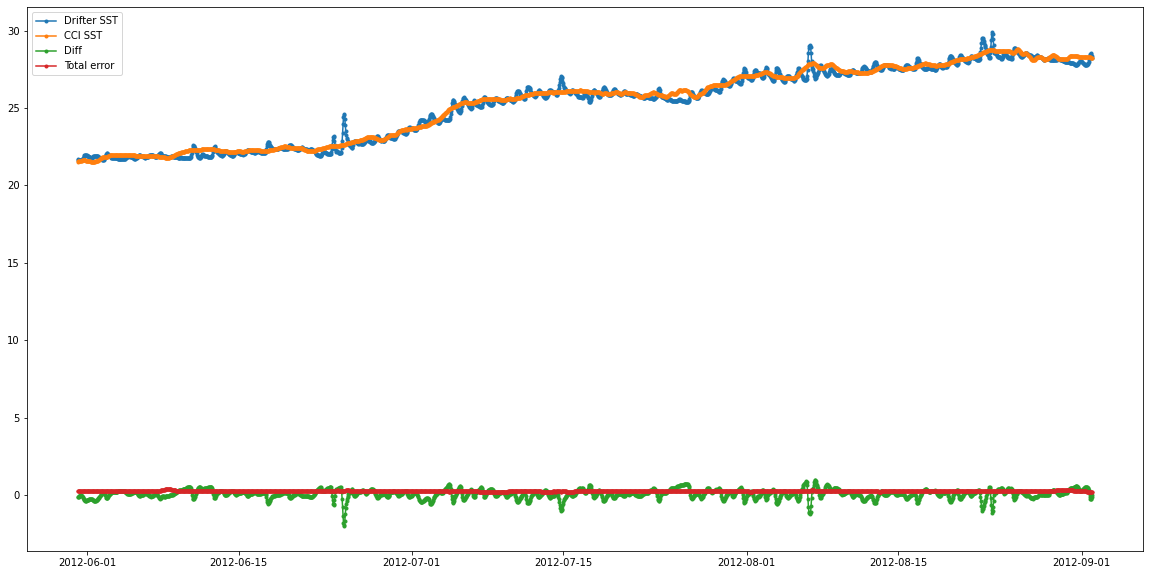

In [190]:
i = 10
sli = slice(traj_idx[i], traj_idx[i+1])
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot()
c1 = plt.plot(dr.time[sli],dr.sst[sli]-273.15,marker='.',label='Drifter SST')
c2 = plt.plot(dsi.time[sli],dsi.analysed_sst[sli]-273.15,marker='.',label='CCI SST')
c3 = plt.plot(dsi.time[sli],dsi.analysed_sst[sli]-dr.sst[sli],marker='.',label='Diff')
c4 = plt.plot(dsi.time[sli],np.sqrt(dsi.analysed_sst_uncertainty[sli]**2+dr.err_sst[sli]**2),marker='.',label='Total error')
#ax.legend([c1,c2,c3,c4],['Drifter SST','CCI SST','Diff','Total error'])
ax.legend()

In [117]:
dr.sst[sli].values

array([293.01392, 292.95993, 292.92023, ..., 299.80774, 299.7923 ,
       299.78   ], dtype=float32)

In [118]:
ds

,Array,Chunk
Bytes,1.35 TiB,49.44 MiB
Shape,"(14367, 3600, 7200)","(50, 360, 720)"
Count,28801 Tasks,28800 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,1.35 TiB,49.44 MiB
Shape,"(14367, 3600, 7200)","(50, 360, 720)"
Count,28801 Tasks,28800 Chunks
Type,float32,numpy.ndarray
,Array,Chunk


In [127]:
range(0,10)

range(0, 10)

In [202]:
for i in range(17322,17324):
    display(slice(traj_idx[i], traj_idx[i+1]))

slice(165734109, 165751206, None)

slice(165751206, 165754333, None)

In [142]:
np.nan*1

nan

In [191]:
#dsi.to_netcdf('../data/process/gdp_cci_sst_v2.00.nc')

In [2]:
i=1

In [5]:
print("s=" + str(i))

s=1
